
#  **Yulu Business Case Study - Hypothesis Testing (Pavithran)**

![alt text](<yululogo.jpg>)

#### **About:**

- Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

- Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

- Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# **Business Problem**

- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands


In [406]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, ttest_ind , levene, shapiro, f_oneway, kruskal, chi2_contingency, chisquare, ttest_1samp, probplot
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings('ignore')
import copy

In [46]:
df = pd.read_csv('bike_sharing.csv')
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

# **Features of the dataset:**

The dataset has the following features:
- **datetime:** datetime.
- **season:** season (1: spring, 2: summer, 3: fall, 4: winter)
- **holiday:** whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **workingday:** if day is neither weekend nor holiday is 1, otherwise is 0. 
- **weather:** 
    
    1: Clear, Few clouds, partly cloudy, partly cloudy

    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- **temp:** temperature in Celsius
- **atemp:** feeling temperature in Celsius
- **humididty:** humidity
- **windspeed:** wind speed 
- **casual:** count of casual users  
- **registered:** count of registered users  
- **count:** count of total rental bikes including both casual and registered  

# **Checking the Structure of the dataset:**

# **Shape of the data**

In [47]:
df.shape

(10886, 12)

In [48]:
df.ndim

2

#### **Insights:**
*  Shape of Dataframe is 10886 * 12
*  Number of rows = 10886
*  Number of columns = 12

# **Checking the Characteristics of the dataset:**

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### **Insights:**

*   There are no missing values in the given dataframe.
*   8 of the columns are numerical datatype.
*   3 of the columns are Object datatype.
*   1 of the columns are float datatype.

# **Checking for Null Values and Duplicated Values in the dataset**

In [50]:
null_values = df.isnull().sum()
print("Total No.Of Null Values:")
print(null_values)

Total No.Of Null Values:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [51]:
duplicated_values = df.duplicated().sum()
print("Total No.Of Duplicated Values : ", duplicated_values)

Total No.Of Duplicated Values :  0


#### **Insights:**

*   We found that that the given dataset contains **No Null Values**
*   We found that that the given dataset contains **No Duplicated Values** 



# **Checking the Statistical Summary of the dataset:**

In [52]:
df.describe().T

count        mean         std   min      25%      50%       75%  \
season      10886.0    2.506614    1.116174  1.00   2.0000    3.000    4.0000   
holiday     10886.0    0.028569    0.166599  0.00   0.0000    0.000    0.0000   
workingday  10886.0    0.680875    0.466159  0.00   0.0000    1.000    1.0000   
weather     10886.0    1.418427    0.633839  1.00   1.0000    1.000    2.0000   
temp        10886.0   20.230860    7.791590  0.82  13.9400   20.500   26.2400   
atemp       10886.0   23.655084    8.474601  0.76  16.6650   24.240   31.0600   
humidity    10886.0   61.886460   19.245033  0.00  47.0000   62.000   77.0000   
windspeed   10886.0   12.799395    8.164537  0.00   7.0015   12.998   16.9979   
casual      10886.0   36.021955   49.960477  0.00   4.0000   17.000   49.0000   
registered  10886.0  155.552177  151.039033  0.00  36.0000  118.000  222.0000   
count       10886.0  191.574132  181.144454  1.00  42.0000  145.000  284.0000   

                 max  
season        4.0000  
holiday       1.0000  
workingday    1.0000  
weather       4.0000  
temp         41.0000  
atemp        45.4550  
humidity    100.0000  
windspeed    56.9969  
casual      367.0000  
registered  886.0000  
count       977.0000

#### **Insights:**
- season: The most frequent activity in Winter Season and minimum activity season in Spring.
- weather: The most frequent activity in (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) and minimum activity in (Clear, Few clouds, partly cloudy, partly cloudy).
- temp: The minimum temperature is 0.82° Celcius and maximum temperature is 41° Celcius and the mean temperature is 20.23° Celcius.
- atemp: The minimum feeling temp is 0.76° Celcius and maximum feeling temp is 45.46° Celcius and the mean feeling temp is 23.66° Celcius.
- humidity: The minimum humidity is 0 and maximum humidity is 100 and the mean humidity is 61.89.
- windspeed: The minimum windspeed is 0 and maximum windspeed is 56.99 and the mean windspeed is 12.80.
- casual: The maximum no of vechicle booked by casual user in a day is 367 and mean no of vechicle booked by casual user in a day is 36.
- registered: Maximum no of vechicle booked by registred user in a day is 886 and mean no of vechicle booked by registred user in a day is 155.
- count: The maximum no of vechicle booked in a day is 977 and mean no of vechicle booked in a day is 191.


# **Convert the datetime column to datetime Datatype**

In [53]:
df["datetime"] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


# **Categorical data Conversion**

In [54]:
cat_column = ["season","holiday","workingday","weather"]

for i in cat_column:
  df[i] = df[i].astype("object")

# **Time period range**

In [55]:
print(f"Minimum Time Entry : { df['datetime'].min() }")
print(f"Maximum Time Entry : { df['datetime'].max() }")

Minimum Time Entry : 2011-01-01 00:00:00
Maximum Time Entry : 2012-12-19 23:00:00


In [56]:
print(f"Date Range : {df['datetime'].max() - df['datetime'].min()} ")

Date Range : 718 days 23:00:00 


#### **Insights:**

- datetime: The data spans from January 1, 2011, to December 19, 2012, and we got data of 718 days.

# **Replacing Values of Season , holiday and workingday Column**


- Season : season (1: spring, 2: summer, 3: fall, 4: winter)
- Holiday : holiday (1 : Yes, 0 : No )
- Workingday : workingday (1 : Yes, 0 : No )

In [57]:
df["season"] = df["season"].replace({1: "Spring",  2: "Summer" , 3: "Fall" , 4 : "Winter"})
df["season"].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [58]:
df["holiday"] = df["holiday"].replace({1 : "Yes" , 0 :"No"})
df["holiday"].unique()

array(['No', 'Yes'], dtype=object)

In [59]:
df["workingday"] = df["workingday"].replace({1 : "Yes" , 0 :"No"})
df["workingday"].unique()

array(['No', 'Yes'], dtype=object)

# **Non-Graphical Analysis: Value Counts and Unique Attributes**

In [60]:
for i in df.columns:
    print(f"Unique Value of {i}:")
    print(df[i].unique())
    print("-"*50)
    print(f"Total No of {i}: ", df[i].nunique())
    print("-"*50)
    print(f"Value Count of {i}:")
    print(df[i].value_counts().sort_values(ascending= False).head(5))
    print("-"*50)
    print()

Unique Value of datetime:
<DatetimeArray>
['2011-01-01 00:00:00', '2011-01-01 01:00:00', '2011-01-01 02:00:00',
 '2011-01-01 03:00:00', '2011-01-01 04:00:00', '2011-01-01 05:00:00',
 '2011-01-01 06:00:00', '2011-01-01 07:00:00', '2011-01-01 08:00:00',
 '2011-01-01 09:00:00',
 ...
 '2012-12-19 14:00:00', '2012-12-19 15:00:00', '2012-12-19 16:00:00',
 '2012-12-19 17:00:00', '2012-12-19 18:00:00', '2012-12-19 19:00:00',
 '2012-12-19 20:00:00', '2012-12-19 21:00:00', '2012-12-19 22:00:00',
 '2012-12-19 23:00:00']
Length: 10886, dtype: datetime64[ns]
--------------------------------------------------
Total No of datetime:  10886
--------------------------------------------------
Value Count of datetime:
datetime
2011-01-01 00:00:00    1
2011-01-01 07:00:00    1
2011-01-01 21:00:00    1
2011-01-01 20:00:00    1
2011-01-01 19:00:00    1
Name: count, dtype: int64
--------------------------------------------------

Unique Value of season:
['Spring' 'Summer' 'Fall' 'Winter']
--------------------

# **Checking the difference between Mean and Median:**

In [61]:
mean =round(df["casual"].mean())
median = round(df["casual"].median())

diff = round((mean - median))
print (f"Casual User column has a significant difference between mean ({mean}) and median ({median}) and the difference({diff}), indicating potential skewness or outliers.")

Casual User column has a significant difference between mean (36) and median (17) and the difference(19), indicating potential skewness or outliers.


In [62]:
mean =round(df["registered"].mean())
median = round(df["registered"].median())

diff = round((mean - median))
print (f"Registered User column has a significant difference between mean ({mean}) and median ({median}) and the difference({diff}), indicating potential skewness or outliers.")

Registered User column has a significant difference between mean (156) and median (118) and the difference(38), indicating potential skewness or outliers.


In [63]:
mean =round(df["count"].mean())
median = round(df["count"].median())

diff = round((mean - median))
print (f" User column has a significant difference between mean ({mean}) and median ({median}) and the difference({diff}), indicating potential skewness or outliers.")

 User column has a significant difference between mean (192) and median (145) and the difference(47), indicating potential skewness or outliers.


# **Checking for Outliers in the dataset:**

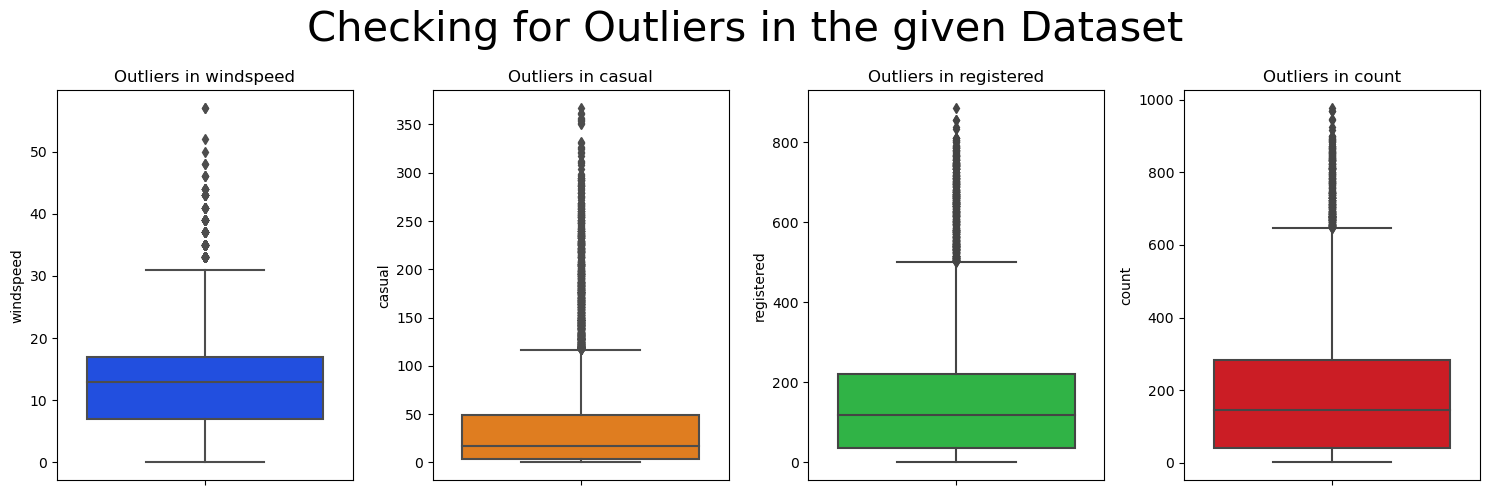

In [95]:
columns = ["windspeed", "casual", "registered", "count"]
colors = sns.color_palette("bright", n_colors=len(columns))
plt.figure(figsize=(15, 5))
for i, j in enumerate(columns):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(data=df, y=j, palette=[colors[i]])  
    plt.title(f"Outliers in {j}")
plt.suptitle("Checking for Outliers in the given Dataset", fontsize=30)
plt.tight_layout()
plt.show()

# **Checking Outlier Percentage in the given dataset using IQR**

In [98]:
col = ["windspeed", "casual", "registered", "count"]
for i in col:
    Q1 = round(np.percentile(df[i],25),2)
    Q3 = round(np.percentile(df[i],75),2)
    IQR = Q3 - Q1
    print(f"25th Percetile of {i} is {Q1}")
    print(f"75th Percetile of {i} is {Q3}")
    print(f"IQR of {i} is {IQR}")
    Upper_bound = Q3 + (1.5 * IQR)
    Lower_bound = Q1 - (1.5 * IQR)
    print(f"Upper Bound of {i} is {Upper_bound}")
    print(f"Lower Bound of {i} is {Lower_bound}")
    Outlier_percentage = round((len(df.loc[df[i] > Upper_bound])/len(df))*100,2)
    print(f"Outlier Percentage of {i} is {Outlier_percentage}")
    print("*"*40)

25th Percetile of windspeed is 7.0
75th Percetile of windspeed is 17.0
IQR of windspeed is 10.0
Upper Bound of windspeed is 32.0
Lower Bound of windspeed is -8.0
Outlier Percentage of windspeed is 2.09
****************************************
25th Percetile of casual is 4.0
75th Percetile of casual is 49.0
IQR of casual is 45.0
Upper Bound of casual is 116.5
Lower Bound of casual is -63.5
Outlier Percentage of casual is 6.88
****************************************
25th Percetile of registered is 36.0
75th Percetile of registered is 222.0
IQR of registered is 186.0
Upper Bound of registered is 501.0
Lower Bound of registered is -243.0
Outlier Percentage of registered is 3.89
****************************************
25th Percetile of count is 42.0
75th Percetile of count is 284.0
IQR of count is 242.0
Upper Bound of count is 647.0
Lower Bound of count is -321.0
Outlier Percentage of count is 2.76
****************************************


#### **Insights:**
- **Windspeed:**
    - 25th Percentile (Q1): 7.0 (25% of data below this value).
    - 75th Percentile (Q3): 17.0 (75% of data below this value).
    - IQR: 10.0 (Range between Q1 and Q3).
    - Upper Bound: 32.0 (Values above this are outliers).
    - Lower Bound: -8.0 (Values below this are outliers).
    - Outlier Percentage: 2.09% (Percentage of data points outside the bounds).
- **Casual:**
    - 25th Percentile (Q1): 4.0.
    - 75th Percentile (Q3): 49.0.
    - IQR: 45.0.
    - Upper Bound: 116.5.
    - Lower Bound: -63.5.
    - Outlier Percentage: 6.88%.
- **Registered:**
    - 25th Percentile (Q1): 36.0.
    - 75th Percentile (Q3): 222.0.
    - IQR: 186.0.
    - Upper Bound: 501.0.
    - Lower Bound: -243.0.
    - Outlier Percentage: 3.89%.
- **Count:**
    - 25th Percentile (Q1): 42.0.
    - 75th Percentile (Q3): 284.0.
    - IQR: 242.0.
    - Upper Bound: 647.0.
    - Lower Bound: -321.0.
    - Outlier Percentage: 2.76%
--------------------

# **Visual Analysis - Univariate & Bivariate** 

In [99]:
# Creating a function to give values in chart:
def add_labels(bar):
    for container in bar.containers:
        bar.bar_label(container)

### **1. Season Distribution & Holiday Distribution & Working Day Distribution & Weather Distribution**

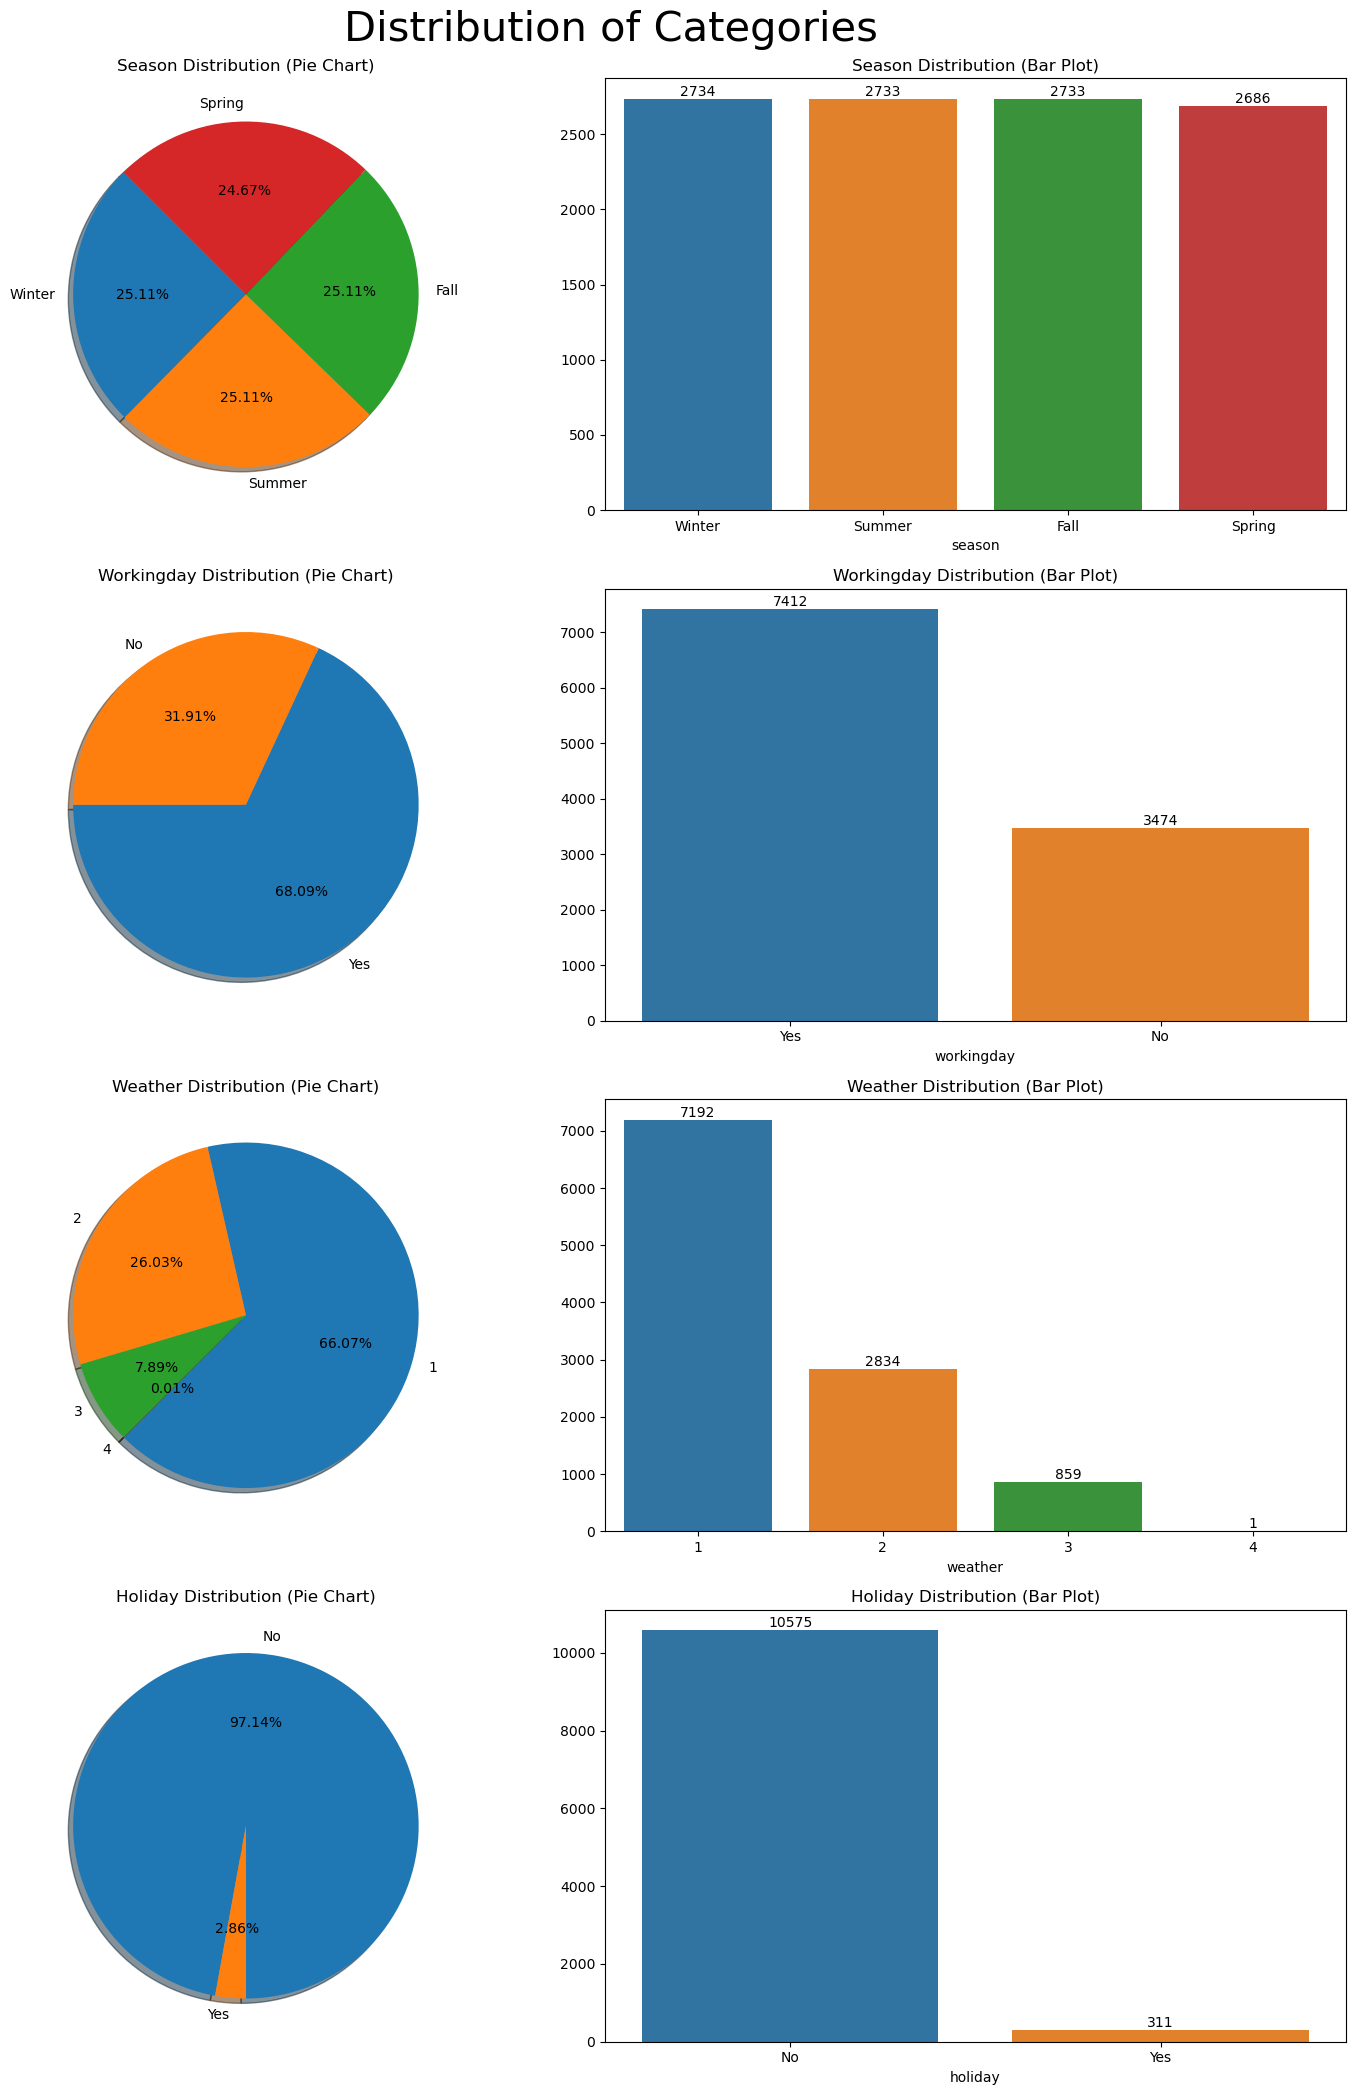

In [204]:
columns = ["season", "workingday", "weather", "holiday"]
plt.figure(figsize=(15, 22))
for i, col in enumerate(columns, 1):

    plt.subplot(4, 2, 2*i-1)
    labels = df[col].value_counts().index
    values = df[col].value_counts().values
    plt.pie(values, labels=labels, autopct="%1.2f%%", 
            startangle=90 + (45 * i), shadow=True, 
            colors=sns.color_palette("tab10"))
    plt.title(f"{col.capitalize()} Distribution (Pie Chart)")

    plt.subplot(4, 2, 2*i)
    bar = sns.barplot(x=df[col].value_counts().index, 
                      y=df[col].value_counts().values, 
                      palette="tab10")
    add_labels(bar)
    plt.title(f"{col.capitalize()} Distribution (Bar Plot)")

plt.suptitle("Distribution of Categories", fontsize=30)
plt.tight_layout(rect=[0.0, 0.03, 1, 0.99]) 
plt.show()


#### **Insights:**
- Season Distribution: All Seasons are **Equally Distributed**.
- Holiday: Non-holidays make up 97% of the data.
- Working Day: About 68% of the data corresponds to working days, reflecting the typical work week.
- Clear or partly cloudy weather conditions are observed in 66% of the entries, making it the most common weather type.
--------------------------------

###  **2. Distribution of Numerical Columns**

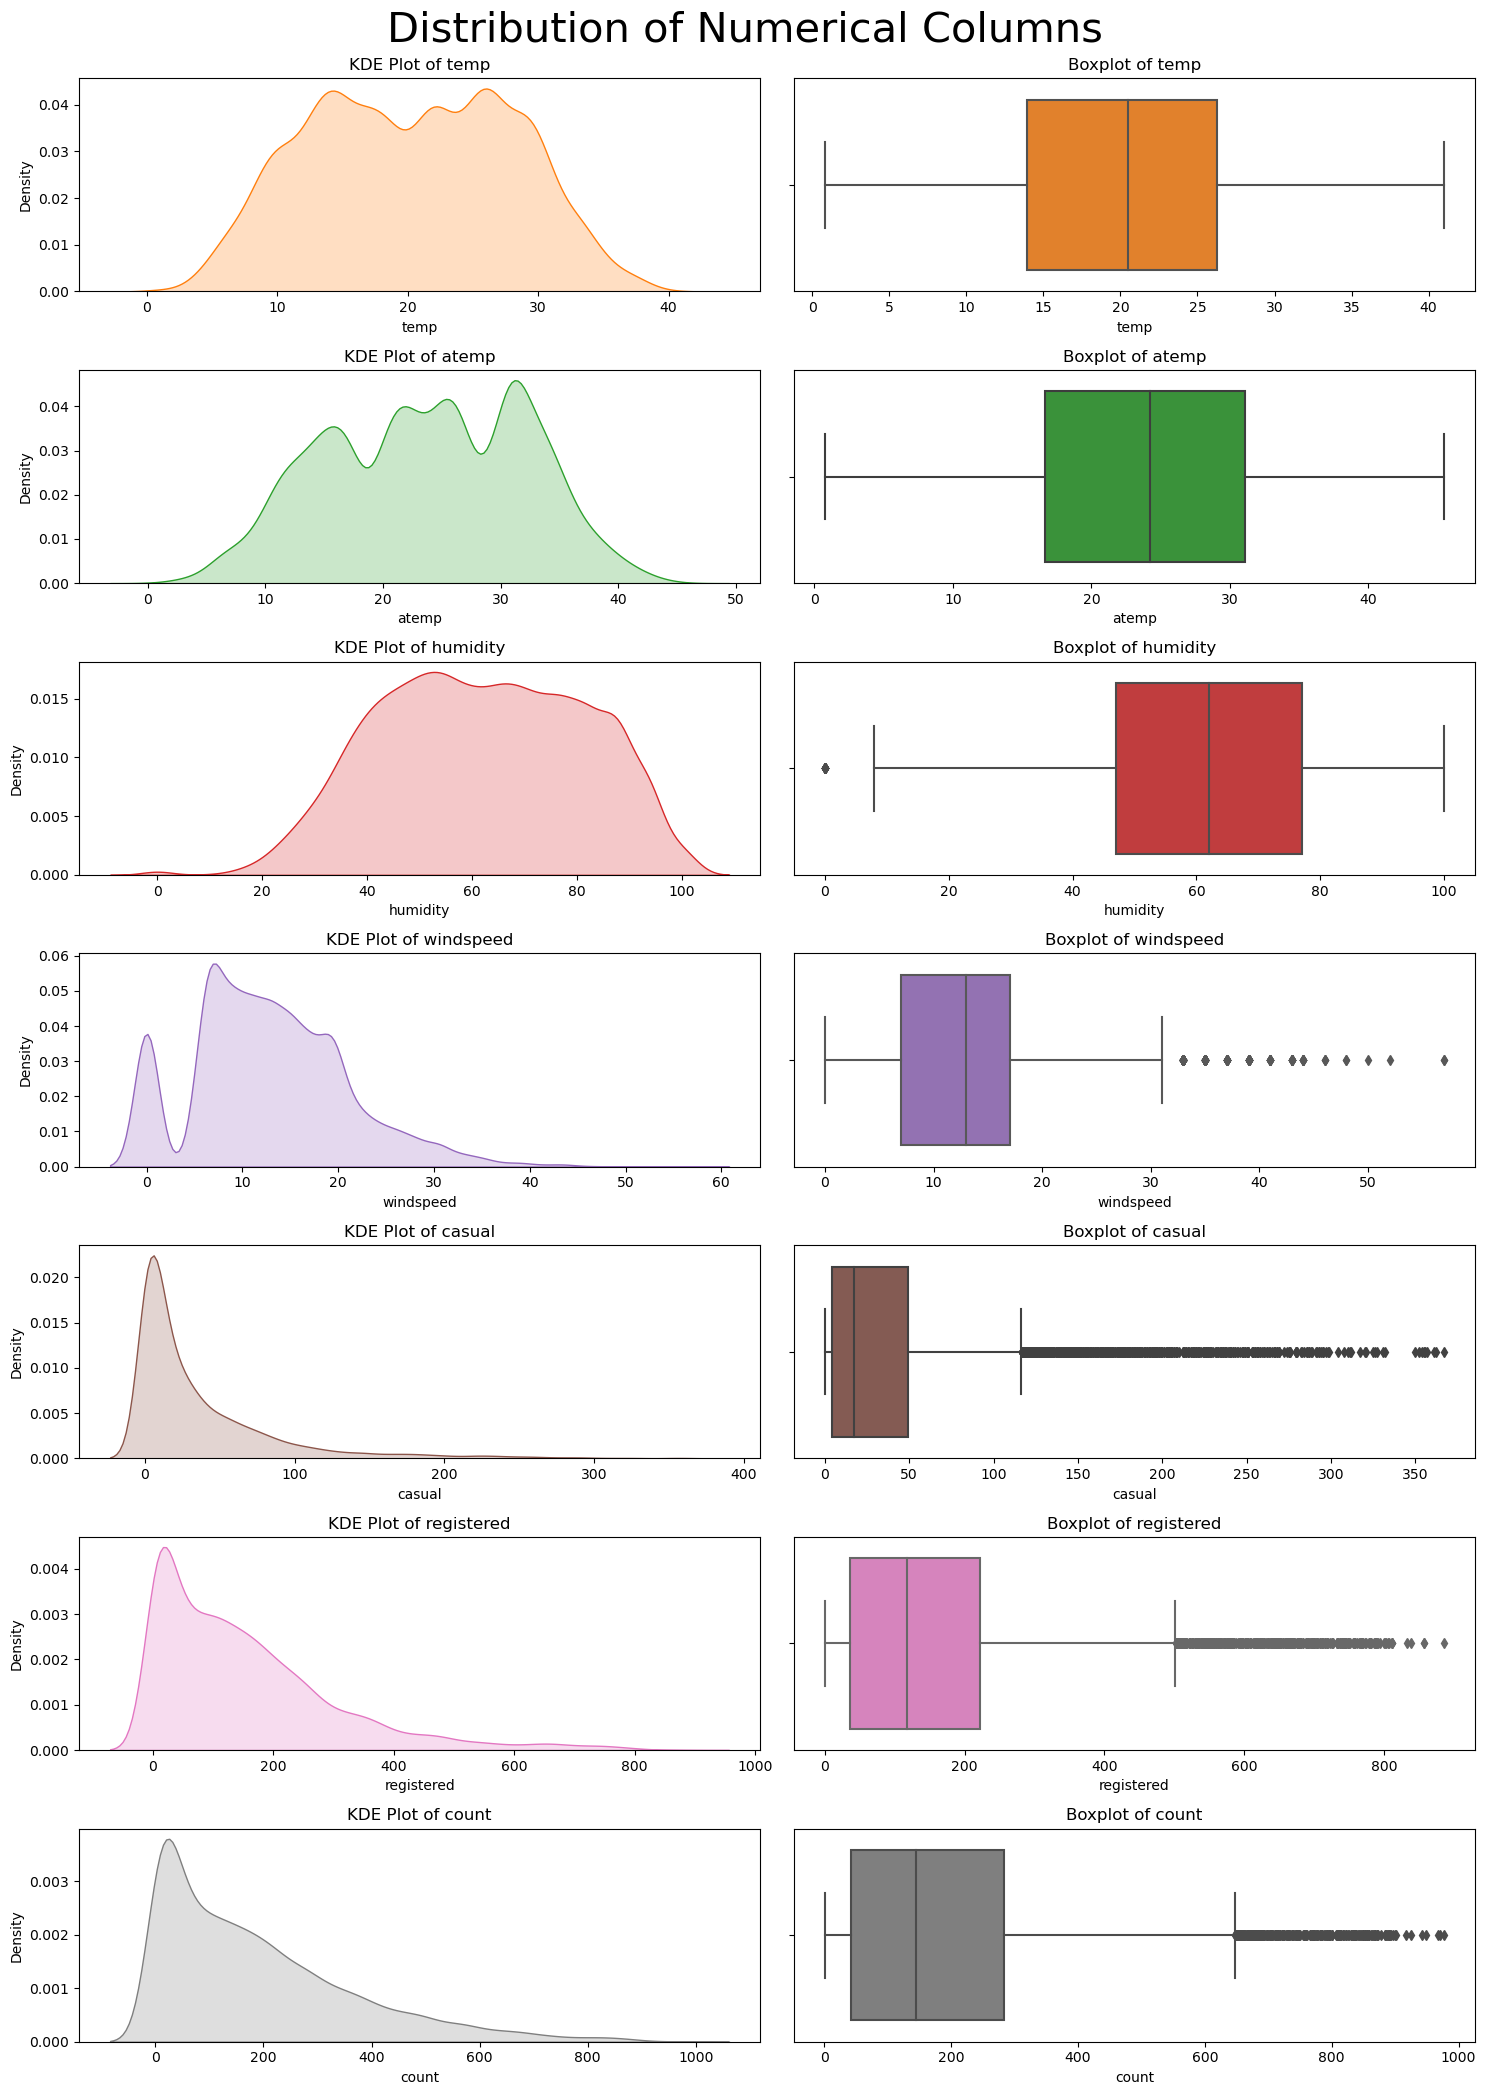

In [209]:
plt.figure(figsize=(15, 22))
colors = sns.color_palette("tab10", n_colors=14)
columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
for i, col in enumerate(columns, 1):
    plt.subplot(7, 2, 2*i - 1)  
    sns.kdeplot(df[col], fill=True, color =colors[i])
    plt.title(f"KDE Plot of {col}")

    plt.subplot(7, 2, 2*i)  
    sns.boxplot(x=df[col], palette=[colors[i]])
    plt.title(f"Boxplot of {col}")

plt.suptitle("Distribution of Numerical Columns", fontsize=30)
plt.tight_layout(rect=[0.0, 0.03, 1, 0.99]) 
plt.show()


#### **Insights:**
- Temperature ('temp'): Ranges from 0.82 to 41.0°C, with a mean of 20.23°C and moderate variability.
- Apparent Temperature ('atemp'): Ranges from 0.76 to 45.455°C, with a mean of 23.66°C and moderate variability.
- Humidity ('humidity'): Values span from 0 to 100, with an average of 61.89.
- Wind Speed ('windspeed'): Wind speeds vary from 0 to 56.9979, averaging 12.80.
- Casual Rentals ('casual'): Positively skewed, ranging from 0 to 367, with a mean of 36.02.
- Registered Rentals ('registered'): Positively skewed, ranging from 0 to 886, with a mean of 155.55.
- Total Rentals ('count'): Ranges from 1 to 977, with a positively skewed distribution and a mean of 191.57.
------------------

###  **3. Relationships between variables workingday and count, holiday and count, season and count, weather and count.**

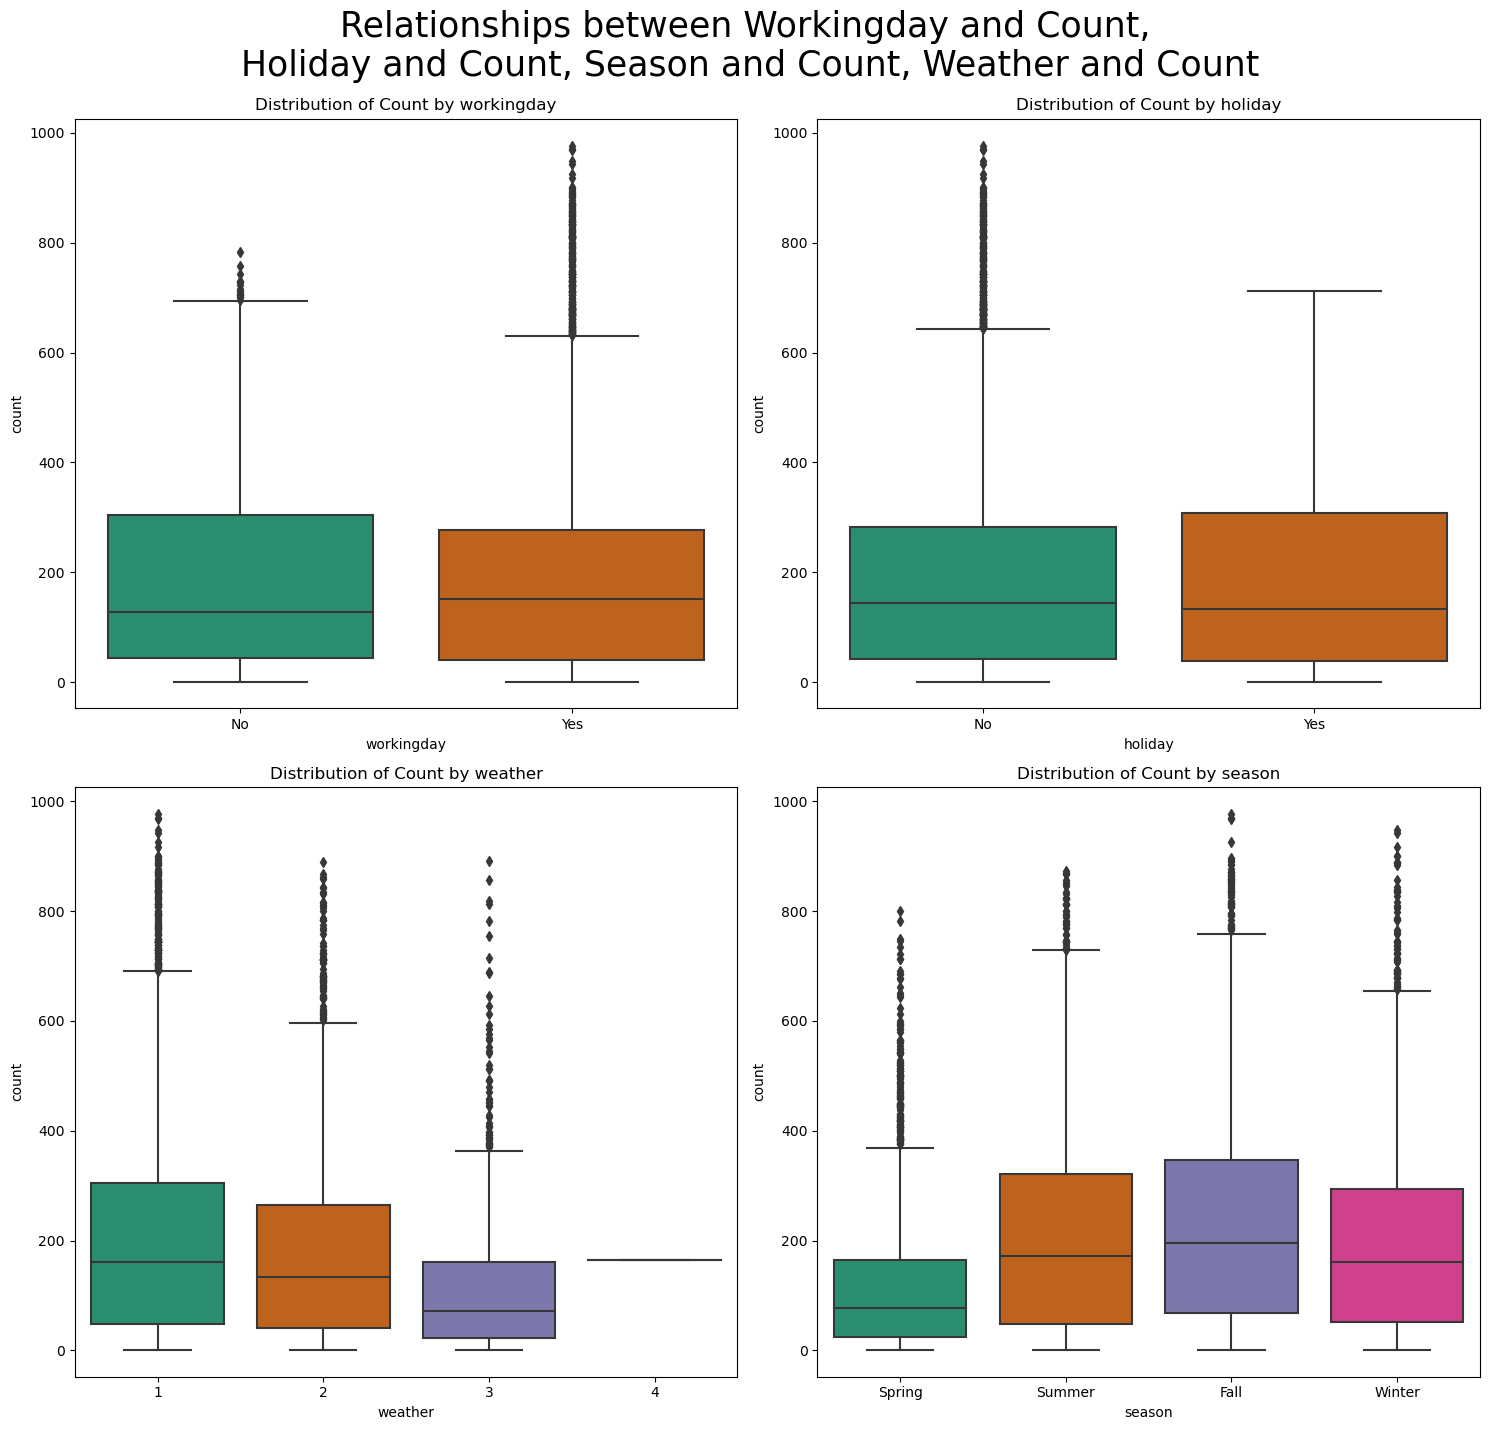

In [267]:
plt.figure(figsize=(15, 15))
colors = sns.color_palette("Dark2", n_colors=14)
columns = ['workingday', 'holiday', 'weather', 'season']
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(x=df[col], y=df['count'], palette=colors)
    plt.title(f"Distribution of Count by {col}")

plt.suptitle("Relationships between Workingday and Count,\n Holiday and Count, Season and Count, Weather and Count", fontsize=25)
plt.tight_layout(rect=[0.0, 0.03, 1, 0.99]) 
plt.show()

---------------------------

###  **3. Distributions of Continuous variables.**

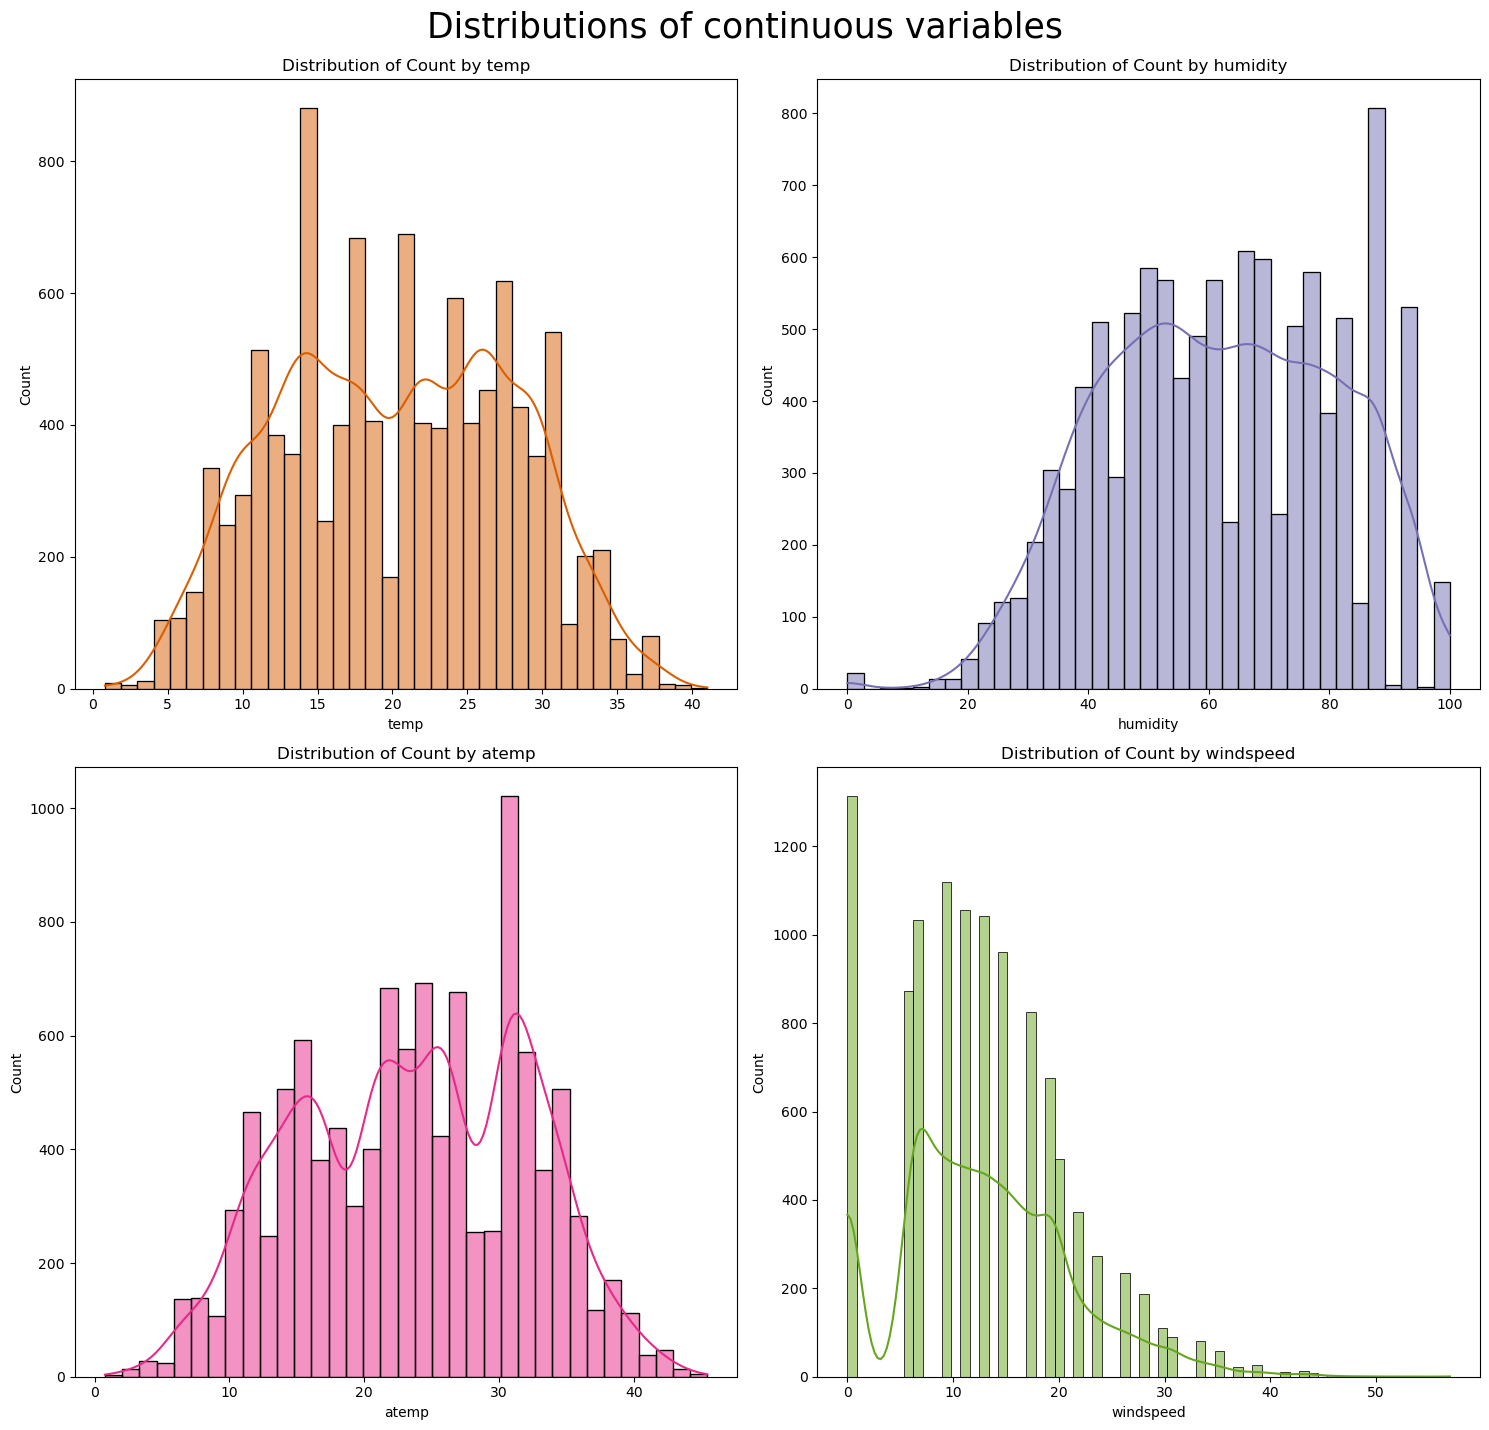

In [275]:
plt.figure(figsize=(15, 15))
colors = sns.color_palette("Dark2", n_colors=14)
columns = ['temp', 'humidity', 'atemp', 'windspeed']
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  
    sns.histplot(df[col], kde=True, color=colors[i])
    plt.title(f"Distribution of Count by {col}")

plt.suptitle("Distributions of continuous variables", fontsize=25)
plt.tight_layout(rect=[0.0, 0.03, 1, 0.99]) 
plt.show()

-----------------------------------------

###  **4. Heatmap (Correlation).**

In [294]:
corr = df.corr(numeric_only = True)
corr

temp     atemp  humidity  windspeed    casual  registered  \
temp        1.000000  0.984948 -0.064949  -0.017852  0.467097    0.318571   
atemp       0.984948  1.000000 -0.043536  -0.057473  0.462067    0.314635   
humidity   -0.064949 -0.043536  1.000000  -0.318607 -0.348187   -0.265458   
windspeed  -0.017852 -0.057473 -0.318607   1.000000  0.092276    0.091052   
casual      0.467097  0.462067 -0.348187   0.092276  1.000000    0.497250   
registered  0.318571  0.314635 -0.265458   0.091052  0.497250    1.000000   
count       0.394454  0.389784 -0.317371   0.101369  0.690414    0.970948   

               count  
temp        0.394454  
atemp       0.389784  
humidity   -0.317371  
windspeed   0.101369  
casual      0.690414  
registered  0.970948  
count       1.000000

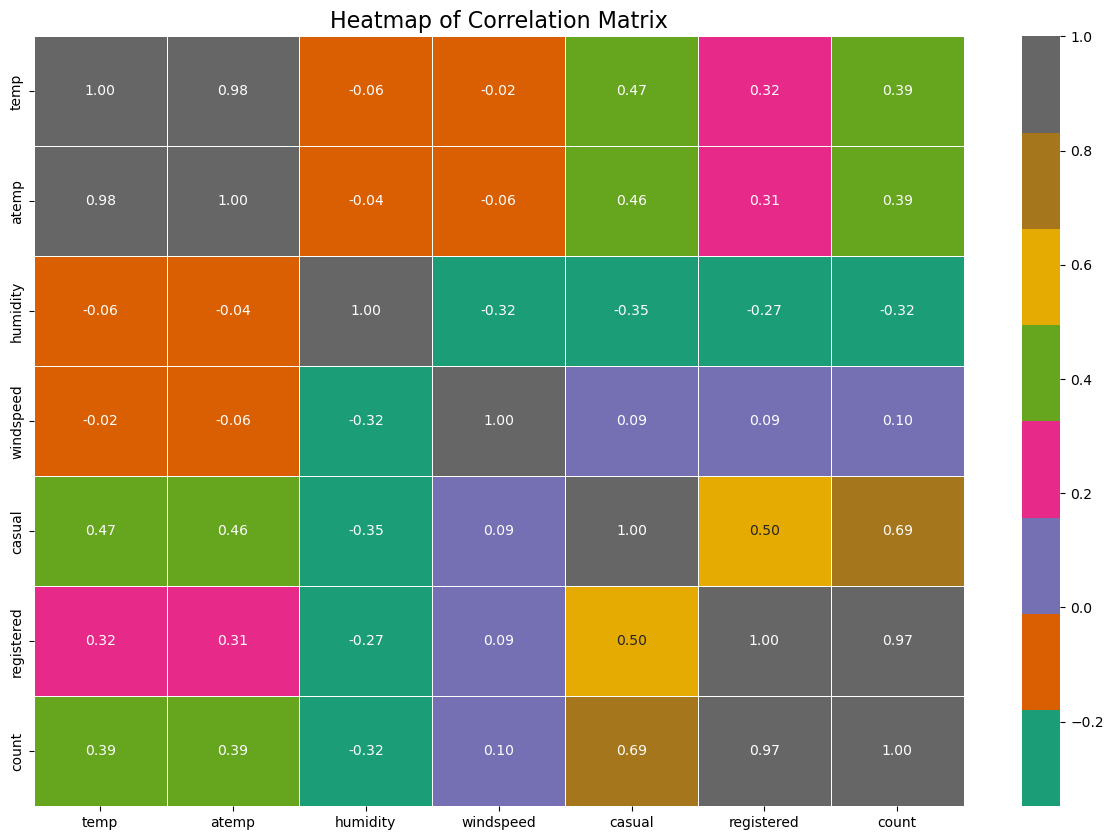

In [312]:
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = "Dark2", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlation Matrix", fontsize=16)
plt.show()

#### **Insights:**
- Temperature ('temp') & Casual Rentals: Higher temperatures are moderately associated with an increase in casual bike rentals.
- Humidity & Bike Rentals: Higher humidity levels are negatively correlated with both casual and registered bike rentals, indicating fewer rentals on more humid days.
- Casual & Registered Rentals: There is a strong positive correlation between casual and registered rentals, suggesting that both user groups tend to increase or decrease their rentals in tandem.
- Registered Rentals & Total Count: The total bike rentals are highly correlated with registered rentals, showing that registered users significantly contribute to the overall rental count.
-------------------------

###  **5. Pairplot**

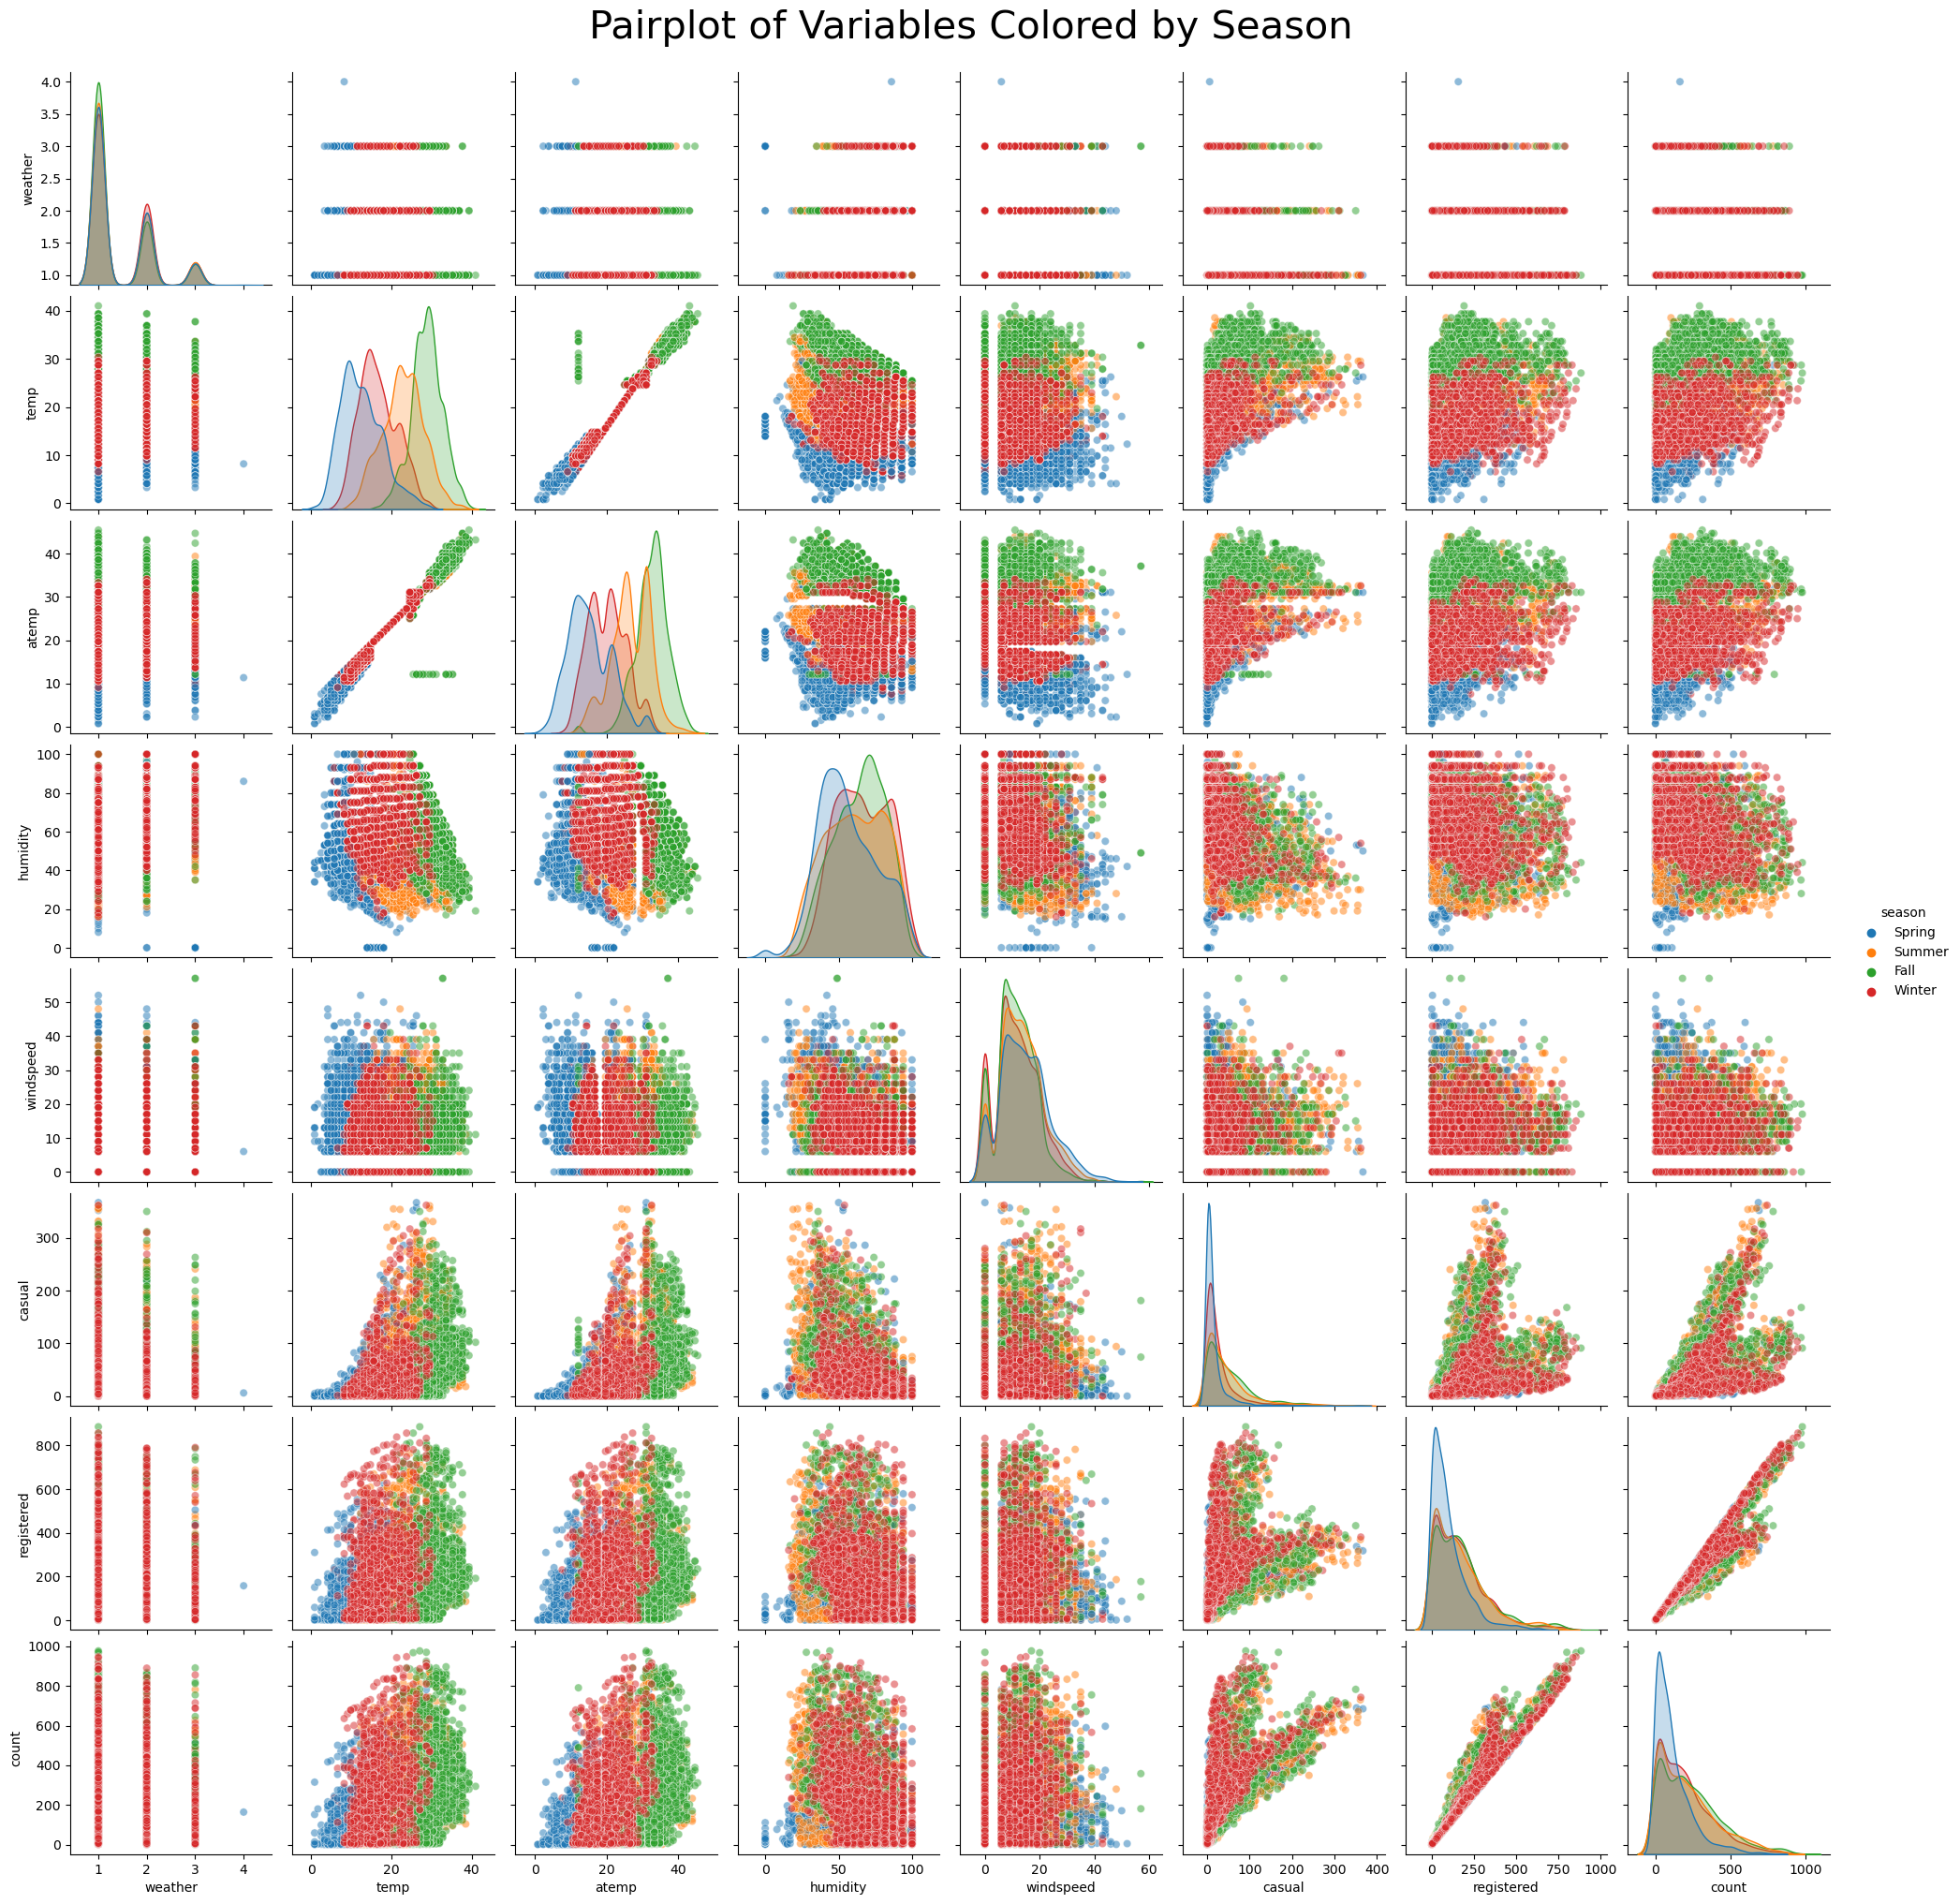

In [319]:
sns.pairplot(df, hue = "season", diag_kind='kde', markers='o', plot_kws={'alpha':0.5})
plt.suptitle("Pairplot of Variables Colored by Season", fontsize=30, y=1.02)
plt.show()


------------------------------

# **Hypothesis Testing**

## **1. Working Day has effect on number of electric cycles rented?**

**Null Hypothesis(H0):** There is **No Significant difference** between booking of electric cycles on Weekdays and Weekends.

**Alternate Hypothesis(Ha):** There is **Significant difference** between booking of electric cycles on Weekdays and Weekends.

# **Assumption Check:**

1. **Normality Check:**  Histogram , QQ PLOT, Shapiro-Wilk test
2. **Variance Check:**  Levene's Test

# **Normality Check**



### **1. Histogram and Q-Q Plot to check Normality Distribution**

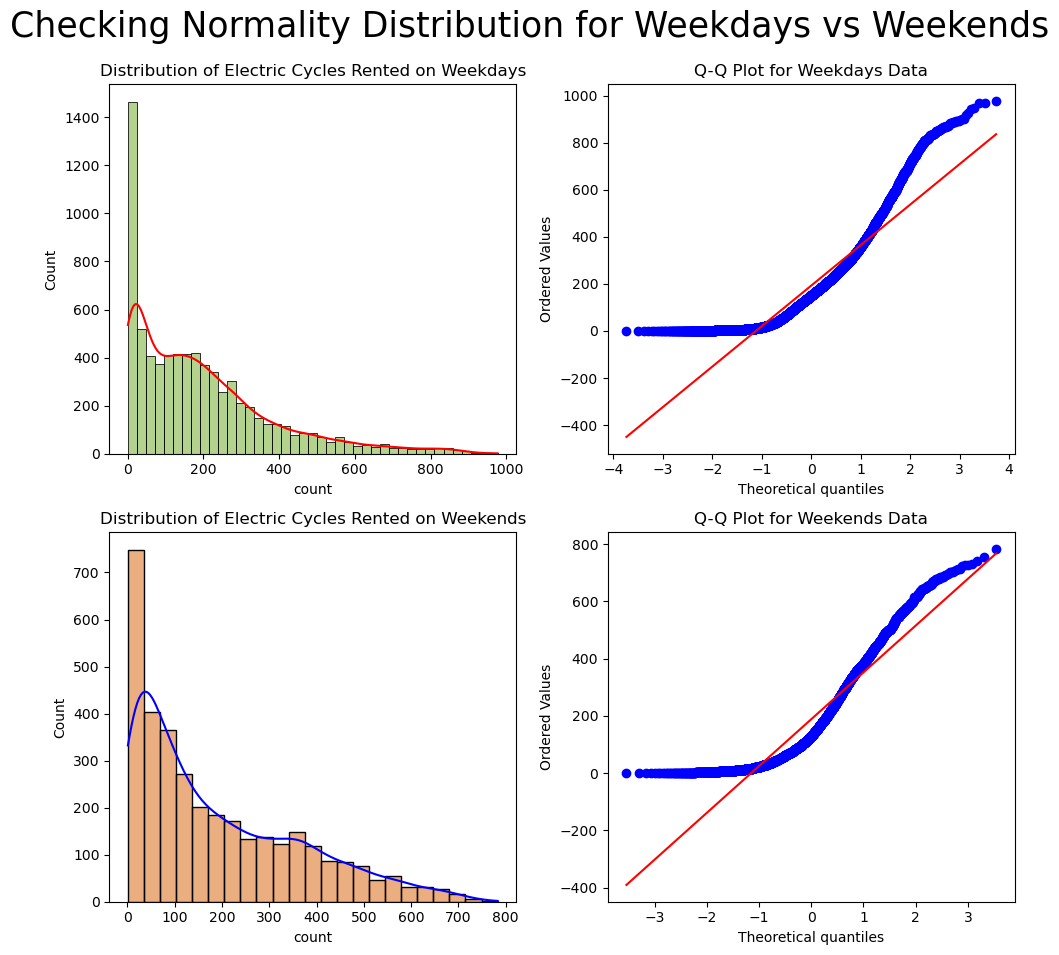

In [570]:
plt.figure(figsize=(10, 10))
weekdays = df[df["workingday"] == "Yes"]["count"]
weekends = df[df["workingday"] == "No"]["count"]
plt.subplot(2, 2, 1)
sns.histplot(weekdays, kde=True, color=sns.color_palette("Dark2")[4]).lines[0].set_color("red") 
plt.title("Distribution of Electric Cycles Rented on Weekdays")

plt.subplot(2, 2, 3)
sns.histplot(weekends, kde=True, color=sns.color_palette("Dark2")[1]).lines[0].set_color("blue")  
plt.title("Distribution of Electric Cycles Rented on Weekends")

# QQ Plot 
plt.subplot(2, 2, 2)
#qqplot(weekdays , line = 's')
probplot(weekdays, dist="norm", plot=plt)
plt.title("Q-Q Plot for Weekdays Data")

plt.subplot(2, 2, 4)
#qqplot(weekends , line = 's')
probplot(weekends, dist="norm", plot=plt)
plt.title("Q-Q Plot for Weekends Data")

plt.suptitle("Checking Normality Distribution for Weekdays vs Weekends", fontsize=25)
plt.tight_layout(rect=[0.0, 0.03, 1, 0.99])
plt.show()

**Insights :**
- Both Weekdays And Weekends distribution does not follow a normal distribution


### **2. Shapiro-Wilk Test to check Normality of distribution**

- The Shapiro-Wilk test works best with sample sizes n ≤ 5000.
- For larger sample sizes, the test may be overly sensitive, leading to the rejection of normality even when the deviations from normality are trivial.

In [571]:
print("*"*50)
print("Week Day Shapiro-Wilk test distribution")
print("*"*50)
stat,p_value = shapiro(weekdays.sample(1000))
print(f"Test Statistics : {stat}")
print(f"P_value : {p_value}")
alpha = 0.05
if p_value < alpha:
  print("Weekday distribution does not follow normal distribution")
else:
  print("Weekday distribution follow normal distribution")


**************************************************
Week Day Shapiro-Wilk test distribution
**************************************************
Test Statistics : 0.8707542419433594
P_value : 5.880764010980746e-28
Weekday distribution does not follow normal distribution


In [572]:
print("*"*50)
print("Week End Shapiro-Wilk test distribution")
print("*"*50)
stat,p_value = shapiro(weekends.sample(1000))
print(f"Test Statistics : {stat}")
print(f"P_value : {p_value}")
alpha = 0.05
if p_value < alpha:
  print("Weekend distribution does not follow normal distribution")
else:
  print("Weekend distribution follow normal distribution")

**************************************************
Week End Shapiro-Wilk test distribution
**************************************************
Test Statistics : 0.8797138929367065
P_value : 4.089346310216862e-27
Weekend distribution does not follow normal distribution


**Insights :**
- Both Weekdays And Weekends distribution does not follow a normal distribution

# **Variance Check (Levene's Test)**



In [461]:
print("*"*50)
print("Weekday Vs Weekend Levene's Test")
print("*"*50)
stat,p_value = levene(weekdays,weekends)
print(f"Test Statistics : {stat}")
print(f"P_value : {p_value}")
if p_value < alpha:
  print("Both Groups don't have equal variance")
else:
  print("Both Groups have equal variance")


**************************************************
Weekday Vs Weekend Levene's Test
**************************************************
Test Statistics : 0.004972848886504472
P_value : 0.9437823280916695
Both Groups have equal variance


**Insights :**
- **Levene's Test for Equal Variance:**
    - Test Statistics: 0.005
    - p-value: 0.944
    - Conclusion: The p-value is very high, so we fail to reject the null hypothesis.
    - This indicates that there is no significant difference in the variance of the number of cycles rented between weekdays and weekends. 
    - In other words, the assumption of equal variance holds true for these two groups.

# **Two-Sample Independent t-test**

In [462]:
print("*"*50)
print("Two-Sample Independent t-test")
print("*"*50)
t_stat, p_value = ttest_ind(weekdays,weekends)
print(f"t_statistics: {t_stat}")
print(f"P_value: {p_value}")

# Assume Significance Level as 5%
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis")
    print("There is Significant difference between booking of electric cycles on Weekdays and Weekends.")
else:
    print("Failed to Reject Null Hypothesis")
    print("There is No Significant difference between booking of electric cycles on Weekdays and Weekends.")    

**************************************************
Two-Sample Independent t-test
**************************************************
t_statistics: 1.2096277376026694
P_value: 0.22644804226361348
Failed to Reject Null Hypothesis
There is No Significant difference between booking of electric cycles on Weekdays and Weekends.


#### **Insights:**
- Based on the results of the two-sample independent t-test, we found that there is **No significant difference** between the number of electric cycles rentals on weekdays and weekends. Specifically:

    - The **t-statistic was 1.21**, which indicates a moderate difference in electric cycles  rental numbers between weekdays and weekends, but not a large one.
    - The **p-value of 0.226** is greater than the common **significance level of 0.05**, which means the difference observed is likely due to random variation rather than a real, statistically significant difference.

- Therefore, **we fail to reject the null hypothesis** 
- Which means that there’s no substantial evidence to support the idea that the number of electric cycles rentals is different on weekdays versus weekends. 
- In simple terms, it seems that bike rental demand does not vary significantly between weekdays and weekends.
--------------------------------------------------------------

## **2. Is there any significant difference between the no. of cycle rented on regular days and holidays?**

**Null Hypothesis(H0):** There is **No significant difference** in the number of cycles rented on regular days and holidays.

**Alternate Hypothesis(Ha):** There is **significantly  different** average number of cycles rented on regular days and holidays.

# **Assumption Check:**

1. **Normality Check:**  Histogram , QQ PLOT, Shapiro-Wilk test
2. **Variance Check:**  Levene's Test

# **Normality Check**

### **1. Histogram and Q-Q Plot to check Normality Distribution**

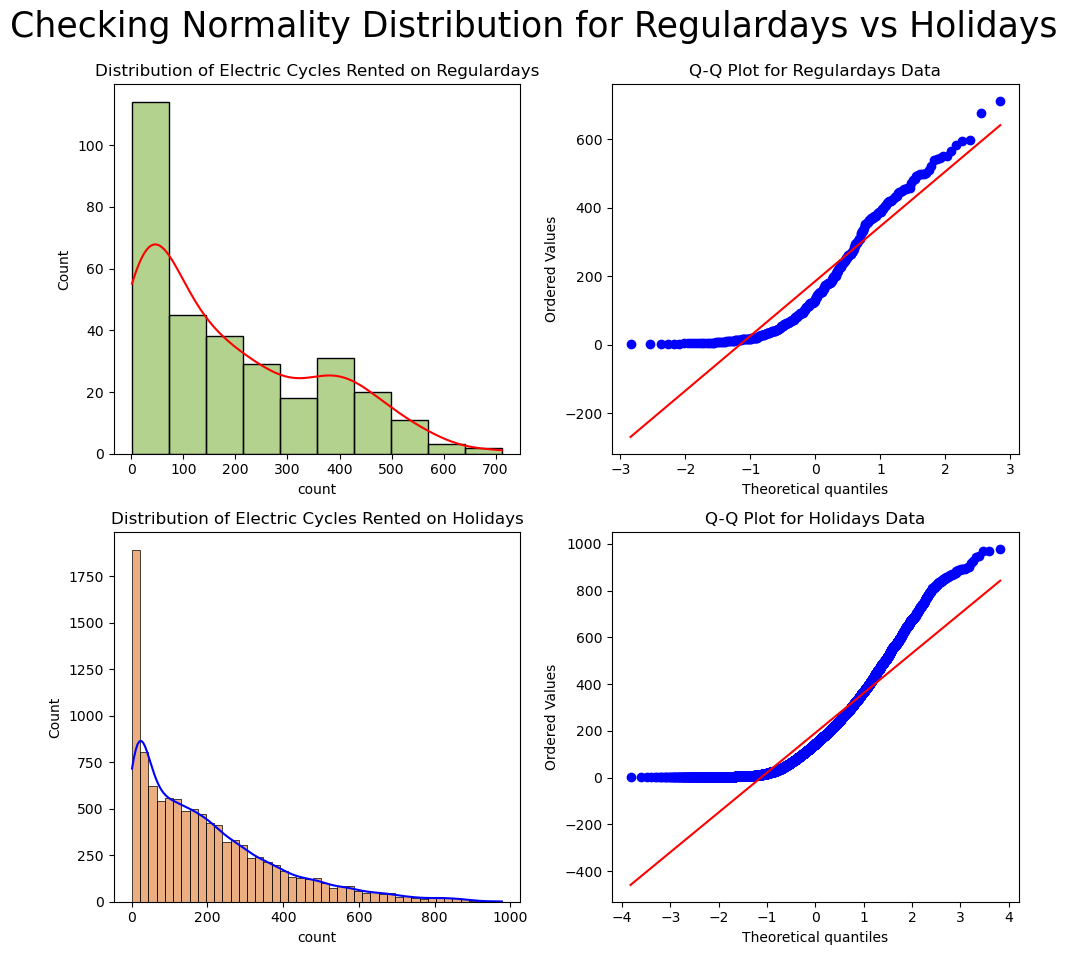

In [558]:
plt.figure(figsize=(10, 10))
regulardays = df[df["holiday"] == "Yes"]["count"]
holidays = df[df["holiday"] == "No"]["count"]
plt.subplot(2, 2, 1)
sns.histplot(regulardays, kde=True, color=sns.color_palette("Dark2")[4]).lines[0].set_color("red") 
plt.title("Distribution of Electric Cycles Rented on Regulardays")

plt.subplot(2, 2, 3)
sns.histplot(holidays, kde=True, color=sns.color_palette("Dark2")[1]).lines[0].set_color("blue")  
plt.title("Distribution of Electric Cycles Rented on Holidays")

# QQ Plot 
plt.subplot(2, 2, 2)
#qqplot(weekdays , line = 's')
probplot(regulardays, dist="norm", plot=plt)
plt.title("Q-Q Plot for Regulardays Data")

plt.subplot(2, 2, 4)
#qqplot(weekends , line = 's')
probplot(holidays, dist="norm", plot=plt)
plt.title("Q-Q Plot for Holidays Data")

plt.suptitle("Checking Normality Distribution for Regulardays vs Holidays", fontsize=25)
plt.tight_layout(rect=[0.0, 0.03, 1, 0.99])
plt.show()

**Insights :**
- Both Regulardays And Holidays distribution does not follow a normal distribution


### **2. Shapiro-Wilk Test to check Normality of distribution**

- The Shapiro-Wilk test works best with sample sizes n ≤ 5000.
- For larger sample sizes, the test may be overly sensitive, leading to the rejection of normality even when the deviations from normality are trivial.

In [561]:
print("*"*50)
print("Regular Days Shapiro-Wilk test distribution")
print("*"*50)
stat,p_value = shapiro(regulardays.sample(300))
print(f"Test Statistics : {stat}")
print(f"P_value : {p_value}")
alpha = 0.05
if p_value < alpha:
  print("RegularDays distribution does not follow normal distribution")
else:
  print("RegularDays distribution follow normal distribution")


**************************************************
Regular Days Shapiro-Wilk test distribution
**************************************************
Test Statistics : 0.8966464400291443
P_value : 1.9672651908105715e-13
RegularDays distribution does not follow normal distribution


In [562]:
print("*"*50)
print("Holidays Shapiro-Wilk test distribution")
print("*"*50)
stat,p_value = shapiro(holidays.sample(300))
print(f"Test Statistics : {stat}")
print(f"P_value : {p_value}")
alpha = 0.05
if p_value < alpha:
  print("Holidays distribution does not follow normal distribution")
else:
  print("Holidays distribution follow normal distribution")

**************************************************
Holidays Shapiro-Wilk test distribution
**************************************************
Test Statistics : 0.8657498955726624
P_value : 1.748727365814644e-15
Holidays distribution does not follow normal distribution


**Insights :**
- Both Regulardays And Holidays distribution does not follow a normal distribution

# **Variance Check (Levene's Test)**



In [565]:
print("*"*50)
print("Regulardays Vs Holidays Levene's Test")
print("*"*50)
stat,p_value = levene(regulardays,holidays)
print(f"Test Statistics : {stat}")
print(f"P_value : {p_value}")
if p_value < alpha:
  print("Both Groups don't have equal variance")
else:
  print("Both Groups have equal variance")


**************************************************
Regulardays Vs Holidays Levene's Test
**************************************************
Test Statistics : 1.222306875221986e-06
P_value : 0.9991178954732041
Both Groups have equal variance


**Insights :**
- **Levene's Test for Equal Variance:**
    - Test Statistics: 1.22 × 10⁻⁶
    - P-value: 0.9991
    - Conclusion: Since the p-value is very large (much greater than 0.05), we fail to reject the null hypothesis. 
    - This indicates that there is no significant difference in variance between bike rentals on regulardays and holidays. The assumption of equal variance holds for both groups.

# **Two-Sample Independent t-test**

In [566]:
print("*"*50)
print("Two-Sample Independent t-test for Regulardays vs Holidays")
print("*"*50)
t_stat, p_value = ttest_ind(regulardays,holidays)
print(f"t_statistics: {t_stat}")
print(f"P_value: {p_value}")

# Assume Significance Level as 5%
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis")
    print("There is Significant difference between booking of electric cycles on Regulardays and Holidays.")
else:
    print("Failed to Reject Null Hypothesis")
    print("There is No Significant difference between booking of electric cycles on Regulardays and Holidays.")    

**************************************************
Two-Sample Independent t-test for Regulardays vs Holidays
**************************************************
t_statistics: -0.5626388963477119
P_value: 0.5736923883271103
Failed to Reject Null Hypothesis
There is No Significant difference between booking of electric cycles on Regulardays and Holidays.


#### **Insights:**
- Result for Two-Sample Independent t-test for Regulardays vs Holidays:

    - t-statistics: -0.5626
    - P-value: 0.5737
    - Conclusion: Since the p-value (0.5737) is much greater than the significance level of 0.05, we fail to reject the null hypothesis.
    - There is no significant difference in the number of electric cycles rented on regular days vs holidays. 
    - This suggests that the booking behavior is not strongly influenced by whether it is a holiday or a regular day.
    - Since there’s no significant difference, other factors such as weather, local events, or promotions might play a more crucial role in affecting rental patterns, and could be explored further for optimization.
-----------------------

## **3. No. of cycles rented similar or different in different seasons?**

**Null Hypothesis(H0):** There is **No significant difference** in the number of cycles rented across the different seasons.

**Alternate Hypothesis(Ha):** There is **significantly  different** average number of cycles rented compared to the others.

# **Assumption Check:**

1. **Normality Check:**  Histogram , QQ PLOT, Shapiro-Wilk test
2. **Variance Check:**  Levene's Test

# **Normality Check**



### **1. Histogram and Q-Q Plot to check Normality Distribution**

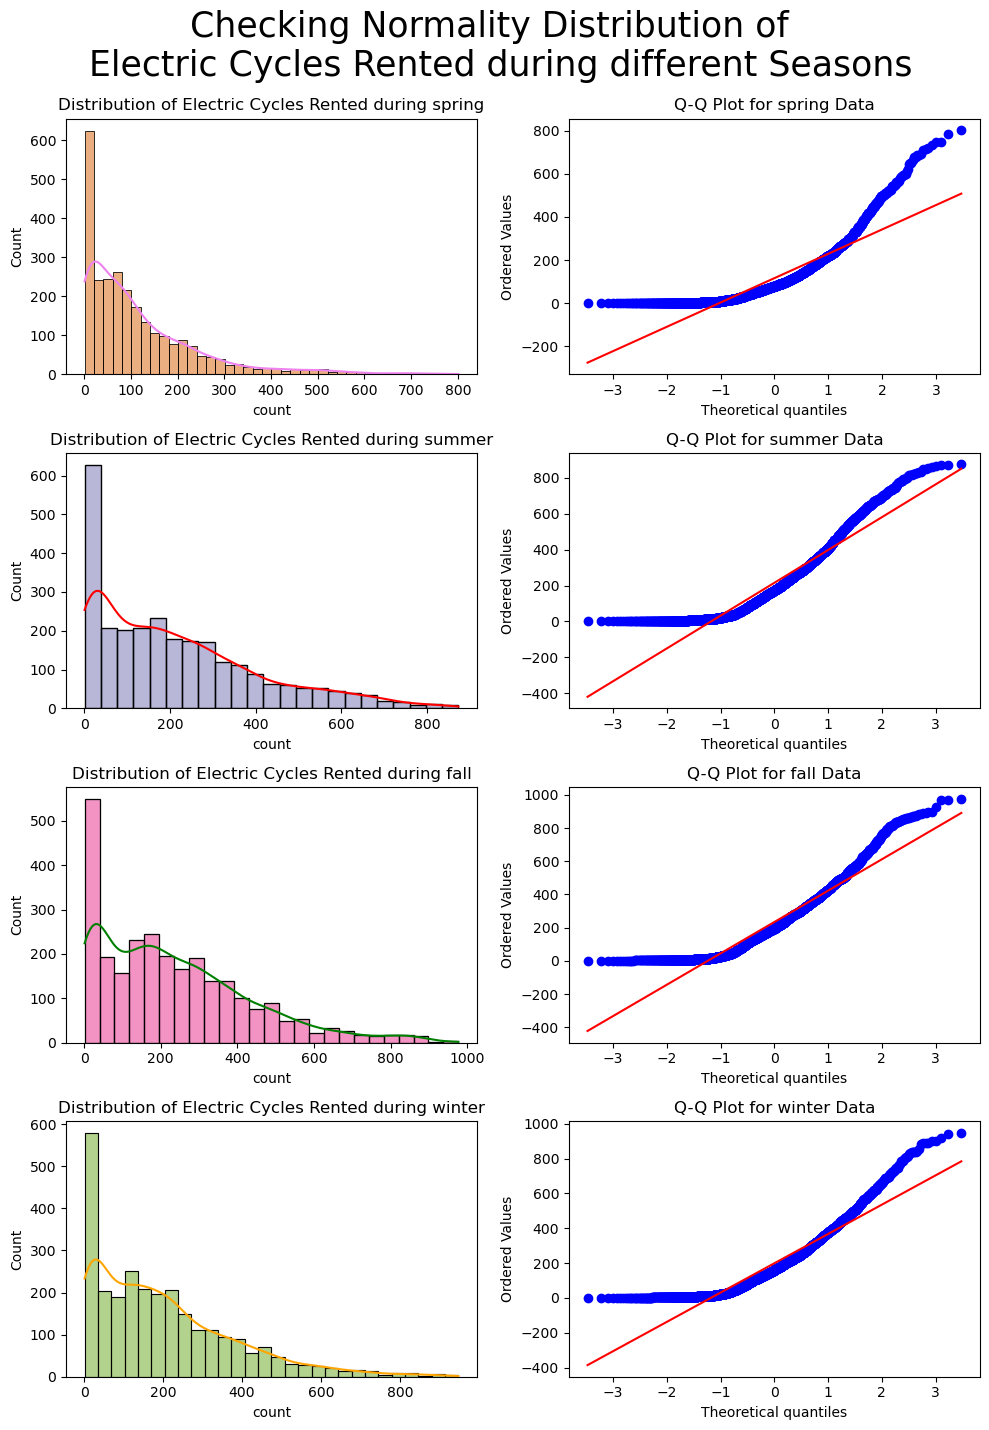

In [574]:
plt.figure(figsize=(10, 15))
spring = df[df["season"]== "Spring"]["count"]
summer = df[df["season"]== "Summer"]["count"]
fall  = df[df["season"]== "Fall"]["count"]
winter = df[df["season"]== "Winter"]["count"]
plt.subplot(4, 2, 1)
sns.histplot(spring, kde=True, color=sns.color_palette("Dark2")[1]).lines[0].set_color("violet") 
plt.title("Distribution of Electric Cycles Rented during spring")

plt.subplot(4, 2, 3)
sns.histplot(summer, kde=True, color=sns.color_palette("Dark2")[2]).lines[0].set_color("red")  
plt.title("Distribution of Electric Cycles Rented during summer")

plt.subplot(4, 2, 5)
sns.histplot(fall, kde=True, color=sns.color_palette("Dark2")[3]).lines[0].set_color("green") 
plt.title("Distribution of Electric Cycles Rented during fall")

plt.subplot(4, 2, 7)
sns.histplot(winter, kde=True, color=sns.color_palette("Dark2")[4]).lines[0].set_color("orange")  
plt.title("Distribution of Electric Cycles Rented during winter")

# QQ Plot 
plt.subplot(4, 2, 2)
probplot(spring, dist="norm", plot=plt)
plt.title("Q-Q Plot for spring Data")

plt.subplot(4, 2, 4)
probplot(summer, dist="norm", plot=plt)
plt.title("Q-Q Plot for summer Data")

plt.subplot(4, 2, 6)
probplot(fall, dist="norm", plot=plt)
plt.title("Q-Q Plot for fall Data")

plt.subplot(4, 2, 8)
probplot(winter, dist="norm", plot=plt)
plt.title("Q-Q Plot for winter Data")

plt.suptitle("Checking Normality Distribution of \n Electric Cycles Rented during different Seasons", fontsize=25)
plt.tight_layout(rect=[0.0, 0.03, 1, 0.99])
plt.show()

**Insights :**
- All Four Seasons distribution does not follow a normal distribution


### **2. Shapiro-Wilk Test to check Normality of distribution**

- The Shapiro-Wilk test works best with sample sizes n ≤ 5000.
- For larger sample sizes, the test may be overly sensitive, leading to the rejection of normality even when the deviations from normality are trivial.

In [455]:
print("*"*50)
print("Spring Season Shapiro-Wilk test distribution")
print("*"*50)
stat,p_value = shapiro(spring.sample(1000))
print(f"Test Statistics : {stat}")
print(f"P_value : {p_value}")
alpha = 0.05
if p_value < alpha:
  print("Spring Season distribution does not follow normal distribution")
else:
  print("Spring Season distribution follow normal distribution")


**************************************************
Spring Season Shapiro-Wilk test distribution
**************************************************
Test Statistics : 0.8035904169082642
P_value : 3.9111643134574254e-33
Spring Season distribution does not follow normal distribution


In [456]:
print("*"*50)
print("Summer Season Shapiro-Wilk test distribution")
print("*"*50)
stat,p_value = shapiro(summer.sample(1000))
print(f"Test Statistics : {stat}")
print(f"P_value : {p_value}")
alpha = 0.05
if p_value < alpha:
  print("Summer Season distribution does not follow normal distribution")
else:
  print("Summer Season distribution follow normal distribution")

**************************************************
Summer Season Shapiro-Wilk test distribution
**************************************************
Test Statistics : 0.9018007516860962
P_value : 8.248538180092717e-25
Summer Season distribution does not follow normal distribution


In [457]:
print("*"*50)
print("Fall Season Shapiro-Wilk test distribution")
print("*"*50)
stat,p_value = shapiro(fall.sample(1000))
print(f"Test Statistics : {stat}")
print(f"P_value : {p_value}")
alpha = 0.05
if p_value < alpha:
  print("Fall Season distribution does not follow normal distribution")
else:
  print("Fall Season distribution follow normal distribution")

**************************************************
Fall Season Shapiro-Wilk test distribution
**************************************************
Test Statistics : 0.9141510725021362
P_value : 2.418179740890826e-23
Fall Season distribution does not follow normal distribution


In [488]:
print("*"*50)
print("Winter Season Shapiro-Wilk test distribution")
print("*"*50)
stat,p_value = shapiro(winter.sample(1000))
print(f"Test Statistics : {stat}")
print(f"P_value : {p_value}")
alpha = 0.05
if p_value < alpha:
  print("Winter Season distribution does not follow normal distribution")
else:
  print("Winter Season distribution follow normal distribution")

**************************************************
Winter Season Shapiro-Wilk test distribution
**************************************************
Test Statistics : 0.8978354930877686
P_value : 2.986761986558704e-25
Winter Season distribution does not follow normal distribution


**Insights :**
- All Four Seasons distribution does not follow a normal distribution

# **Variance Check (Levene's Test)**



In [491]:
print("*"*50)
print("Levene's Test For All Four Seasons")
print("*"*50)
stat,p_value = levene(spring, summer, fall, winter)
print(f"Test Statistics : {stat}")
print(f"P_value : {p_value}")
if p_value < alpha:
  print("All Four Seasons don't have equal variance")
else:
  print("All Four Seasons have equal variance")


**************************************************
Levene's Test For All Four Seasons
**************************************************
Test Statistics : 187.7706624026276
P_value : 1.0147116860043298e-118
All Four Seasons don't have equal variance


**Insights :**
- **Levene's Test for Equal Variance:**
    - Test Statistics: 187.77
    - p-value: 1.01 × 10−118
    - Conclusion: The p-value is extremely small, so we reject the null hypothesis.
    - This indicates that the variance in the number of cycles rented is not the same across the four seasons (Spring, Summer, Fall, Winter).

- We can not use Two Sample Independent t-test because for analysing seasons the category is more than 2 so we use **ANOVA Test**

## **Conditions For ANOVA Test**
- **Two of the three conditions for ANOVA are not met, we will still proceed with the ANOVA test.**

- **we will conduct Kruskal's test for comparison.**

- **If there are any discrepancies between the results, we will rely on Kruskal's test, as the data does not fully meet the assumptions required for ANOVA.**







# **ANOVA TEST**

**Null Hypothesis(H0):** There is **No significant difference** in the number of cycles rented across the different seasons.

**Alternate Hypothesis(Ha):** There is **significantly  different** average number of cycles rented compared to the others.

In [495]:
print("*"*50)
print("ANOVA Test")
print("*"*50)
stat,p_value = f_oneway(spring,summer,fall,winter)
print(f"t_statistics: {stat}")
print(f"P_value: {p_value}")

# Assume Significance Level as 5%
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis")
    print("There is a Significantly different average number of cycles rented compared to the other seasons.")
else:
    print("Failed to Reject Null Hypothesis")
    print("There is No significant difference in the number of cycles rented across the different seasons.")    

**************************************************
ANOVA Test
**************************************************
t_statistics: 236.94671081032106
P_value: 6.164843386499654e-149
Reject Null Hypothesis
There is a Significantly different average number of cycles rented compared to the other seasons.


**Insights :**
- **ANOVA Test:**

    - t-statistics: 236.95
    - p-value: 6.16×10−149
    - Conclusion: The p-value is extremely small (far less than the common significance level of 0.05), so we reject the null hypothesis. 
    - This indicates that there is a significant difference in the average number of cycles rented across the different seasons (Spring, Summer, Fall, Winter).

# **Kruskal-Wallis Test**

In [496]:
print("*"*50)
print("Kruskal-Wallis Test")
print("*"*50)
stat,p_value = kruskal(spring,summer,fall,winter)
print(f"t_statistics: {stat}")
print(f"P_value: {p_value}")

# Assume Significance Level as 5%
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis")
    print("There is a Significantly different average number of cycles rented compared to the other seasons.")
else:
    print("Failed to Reject Null Hypothesis")
    print("There is No significant difference in the number of cycles rented across the different seasons.")    

**************************************************
Kruskal-Wallis Test
**************************************************
t_statistics: 699.6668548181988
P_value: 2.479008372608633e-151
Reject Null Hypothesis
There is a Significantly different average number of cycles rented compared to the other seasons.


**Insights :**
- **Kruskal-Wallis Test:**

    - t-statistics: 699.67
    - p-value: 2.48×10−151
    - Conclusion: Similar to the ANOVA test, the p-value is incredibly small, and we reject the null hypothesis. 
    - This test confirms that there is a significant difference in the average number of cycles rented among the seasons.

# **Two-Sample Independent t-tests (Comparing each pair of seasons):**

- Since we got there is a difference in number of cycles rented across season we use **Two Sample t-test** by comparing 2 seasons.
- By doing this we can find in which season there is a differnce in booking

- So, there will be 6 possible pairs to compare:

    - Spring vs Summer
    - Spring vs Fall
    - Spring vs Winter
    - Summer vs Fall
    - Summer vs Winter
    - Fall vs Winter

#### **1. Spring VS Summer**

In [499]:
print("*"*50)
print("Two-Sample Independent t-test for Spring vs Summer")
print("*"*50)
t_stat, p_value = ttest_ind(spring,summer)
print(f"t_statistics: {t_stat}")
print(f"P_value: {p_value}")

# Assume Significance Level as 5%
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis")
    print("There is a Significantly different average number of cycles rented in Spring vs Summer.")
else:
    print("Failed to Reject Null Hypothesis")
    print("There is No significant difference in the number of cycles rented across Spring vs Summer.")    

**************************************************
Two-Sample Independent t-test for Spring vs Summer
**************************************************
t_statistics: -22.41673852194779
P_value: 1.6578587340400095e-106
Reject Null Hypothesis
There is a Significantly different average number of cycles rented in Spring vs Summer.


**Insights :**
- **Spring vs Summer:**

    - t-statistics: -22.42
    - p-value: 1.66×10−106
    - Conclusion: The p-value is extremely small, so we reject the null hypothesis. 
    - There is a significant difference in the average number of cycles rented between Spring and Summer.

#### **2. Spring VS Fall**

In [500]:
print("*"*50)
print("Two-Sample Independent t-test for Spring vs Fall")
print("*"*50)
t_stat, p_value = ttest_ind(spring,fall)
print(f"t_statistics: {t_stat}")
print(f"P_value: {p_value}")

# Assume Significance Level as 5%
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis")
    print("There is a Significantly different average number of cycles rented in Spring vs Fall.")
else:
    print("Failed to Reject Null Hypothesis")
    print("There is No significant difference in the number of cycles rented across Spring vs Fall.")    

**************************************************
Two-Sample Independent t-test for Spring vs Fall
**************************************************
t_statistics: -26.262602569974415
P_value: 3.403850435531097e-143
Reject Null Hypothesis
There is a Significantly different average number of cycles rented in Spring vs Fall.


**Insights :**
- **Spring vs Fall:**

    - t-statistics: -26.26
    - p-value: 3.40×10−143
    - Conclusion: The p-value is very small, so we reject the null hypothesis. 
    - There is a significant difference in the average number of cycles rented between Spring and Fall.

#### **3. Spring VS Winter**

In [501]:
print("*"*50)
print("Two-Sample Independent t-test for Spring vs Winter")
print("*"*50)
t_stat, p_value = ttest_ind(spring,winter)
print(f"t_statistics: {t_stat}")
print(f"P_value: {p_value}")

# Assume Significance Level as 5%
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis")
    print("There is a Significantly different average number of cycles rented in Spring vs Winter.")
else:
    print("Failed to Reject Null Hypothesis")
    print("There is No significant difference in the number of cycles rented across Spring vs Winter.")    

**************************************************
Two-Sample Independent t-test for Spring vs Winter
**************************************************
t_statistics: -19.763761227758852
P_value: 5.236417429066782e-84
Reject Null Hypothesis
There is a Significantly different average number of cycles rented in Spring vs Winter.


**Insights :**
- **Spring vs Winter:**

    - t-statistics: -19.76
    - p-value: 5.24×10−84
    - Conclusion: Again, the p-value is extremely small, so we reject the null hypothesis. 
    - There is a significant difference in the average number of cycles rented between Spring and Winter.

#### **4. Summer VS Fall**

In [502]:
print("*"*50)
print("Two-Sample Independent t-test for Summer vs Fall")
print("*"*50)
t_stat, p_value = ttest_ind(summer,fall)
print(f"t_statistics: {t_stat}")
print(f"P_value: {p_value}")

# Assume Significance Level as 5%
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis")
    print("There is a Significantly different average number of cycles rented in Summer vs Fall.")
else:
    print("Failed to Reject Null Hypothesis")
    print("There is No significant difference in the number of cycles rented across Summer vs Fall.")    

**************************************************
Two-Sample Independent t-test for Summer vs Fall
**************************************************
t_statistics: -3.6407918229052068
P_value: 0.00027431561172498644
Reject Null Hypothesis
There is a Significantly different average number of cycles rented in Summer vs Fall.


**Insights :**
- **Summer vs Fall:**

    - t-statistics: -3.64
    - p-value: 0.00027
    - Conclusion: The p-value is small (less than 0.05), so we reject the null hypothesis. 
    - There is a significant difference in the average number of cycles rented between Summer and Fall.

#### **5. Summer VS Winter**

In [503]:
#### **4. Summer VS Fall**
print("*"*50)
print("Two-Sample Independent t-test for Summer vs Winter")
print("*"*50)
t_stat, p_value = ttest_ind(summer,winter)
print(f"t_statistics: {t_stat}")
print(f"P_value: {p_value}")

# Assume Significance Level as 5%
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis")
    print("There is a Significantly different average number of cycles rented in Summer vs Winter.")
else:
    print("Failed to Reject Null Hypothesis")
    print("There is No significant difference in the number of cycles rented across Summer vs Winter.")    

**************************************************
Two-Sample Independent t-test for Summer vs Winter
**************************************************
t_statistics: 3.2507544346007022
P_value: 0.001157968169413171
Reject Null Hypothesis
There is a Significantly different average number of cycles rented in Summer vs Winter.


**Insights :**
- **Summer vs Winter:**

    - t-statistics: 3.25
    - p-value: 0.00116
    - Conclusion: The p-value is small (less than 0.05), so we reject the null hypothesis. 
    - There is a significant difference in the average number of cycles rented between Summer and Winter.

#### **6. Fall VS Winter**

In [504]:
print("*"*50)
print("Two-Sample Independent t-test for Fall vs Winter")
print("*"*50)
t_stat, p_value = ttest_ind(fall,winter)
print(f"t_statistics: {t_stat}")
print(f"P_value: {p_value}")

# Assume Significance Level as 5%
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis")
    print("There is a Significantly different average number of cycles rented in Fall vs Winter.")
else:
    print("Failed to Reject Null Hypothesis")
    print("There is No significant difference in the number of cycles rented across Fall vs Winter.")    

**************************************************
Two-Sample Independent t-test for Fall vs Winter
**************************************************
t_statistics: 6.980360925184712
P_value: 3.294359667247495e-12
Reject Null Hypothesis
There is a Significantly different average number of cycles rented in Fall vs Winter.


**Insights :**
- **Fall vs Winter:**

    - t-statistics: 6.98
    - p-value: 3.29×10−12
    - Conclusion: The p-value is very small, so we reject the null hypothesis. 
    - There is a significant difference in the average number of cycles rented between Fall and Winter.

#### **Insights:**

- The analysis confirms that there are significant differences in the number of electric cycles rented between different seasons. 
- Every pair of seasons (Spring, Summer, Fall, and Winter) showed significant differences in rental counts.
- Based on the significant differences across seasons, the demand for shared electric cycles is not uniform throughout the year. 
- This suggests that the number of cycles rented is likely influenced by seasonal factors such as weather, holidays, and consumer behavior during those seasons.
--------------------


## **4. No. of cycles rented similar or different in different weather?**

**Null Hypothesis(H0):** There is **No significant difference** in the number of cycles rented across the different weather.

**Alternate Hypothesis(Ha):** There is **significantly  different** average number of cycles rented compared to the weather.

# **Assumption Check:**

1. **Normality Check:**  Histogram , QQ PLOT, Shapiro-Wilk test
2. **Variance Check:**  Levene's Test

# **Types of Weather**
- 1: Clear, Few clouds, partly cloudy, partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


# **Normality Check**



### **1. Histogram and Q-Q Plot to check Normality Distribution**

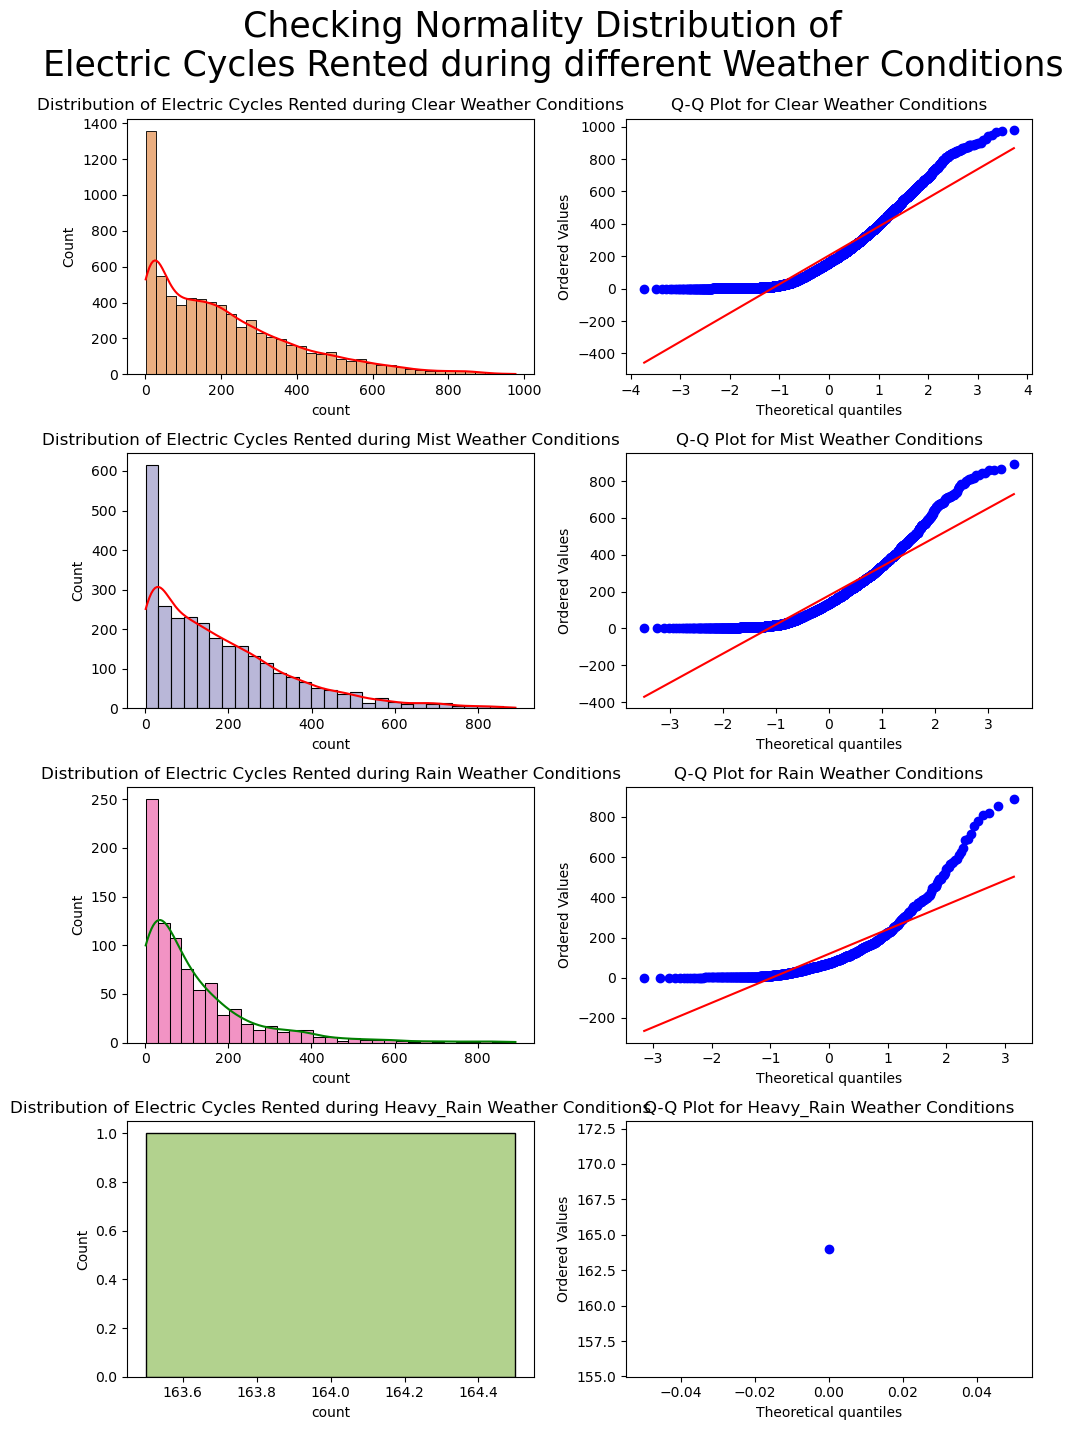

In [577]:
plt.figure(figsize=(10, 15))
clear = df[df["weather"]== 1]["count"]
mist = df[df["weather"]== 2]["count"]
rain  = df[df["weather"]== 3]["count"]
heavy_rain = df[df["weather"]== 4]["count"]
plt.subplot(4, 2, 1)
sns.histplot(clear, kde=True, color=sns.color_palette("Dark2")[1]).lines[0].set_color("red") 
plt.title("Distribution of Electric Cycles Rented during Clear Weather Conditions")

plt.subplot(4, 2, 3)
sns.histplot(mist, kde=True, color=sns.color_palette("Dark2")[2]).lines[0].set_color("red")  
plt.title("Distribution of Electric Cycles Rented during Mist Weather Conditions")

plt.subplot(4, 2, 5)
sns.histplot(rain, kde=True, color=sns.color_palette("Dark2")[3]).lines[0].set_color("green") 
plt.title("Distribution of Electric Cycles Rented during Rain Weather Conditions")

plt.subplot(4, 2, 7)
sns.histplot(heavy_rain, kde=True, color=sns.color_palette("Dark2")[4])#.lines[0].set_color("orange")  
plt.title("Distribution of Electric Cycles Rented during Heavy_Rain Weather Conditions")

# QQ Plot 
plt.subplot(4, 2, 2)
probplot(clear, dist="norm", plot=plt)
plt.title("Q-Q Plot for Clear Weather Conditions")

plt.subplot(4, 2, 4)
probplot(mist, dist="norm", plot=plt)
plt.title("Q-Q Plot for Mist Weather Conditions")

plt.subplot(4, 2, 6)
probplot(rain, dist="norm", plot=plt)
plt.title("Q-Q Plot for Rain Weather Conditions")

plt.subplot(4, 2, 8)
probplot(heavy_rain, dist="norm", plot=plt)
plt.title("Q-Q Plot for Heavy_Rain Weather Conditions")

plt.suptitle("Checking Normality Distribution of \n Electric Cycles Rented during different Weather Conditions", fontsize=25)
plt.tight_layout(rect=[0.0, 0.03, 1, 0.99])
plt.show()

**Insights :**
- All Four Weather Conditions distribution does not follow a normal distribution


### **2. Shapiro-Wilk Test to check Normality of distribution**

- The Shapiro-Wilk test works best with sample sizes n ≤ 5000.
- For larger sample sizes, the test may be overly sensitive, leading to the rejection of normality even when the deviations from normality are trivial.

In [511]:
print("*"*50)
print("Clear Weather Conditions Shapiro-Wilk test distribution")
print("*"*50)
stat,p_value = shapiro(clear.sample(1000))
print(f"Test Statistics : {stat}")
print(f"P_value : {p_value}")
alpha = 0.05
if p_value < alpha:
  print("Clear Weather Conditions distribution does not follow normal distribution")
else:
  print("Clear Weather Conditions distribution follow normal distribution")


**************************************************
Clear Weather Conditions Shapiro-Wilk test distribution
**************************************************
Test Statistics : 0.8943600654602051
P_value : 1.2564953079052152e-25
Clear Weather Conditions distribution does not follow normal distribution


In [515]:
print("*"*50)
print("Mist Weather Conditions Shapiro-Wilk test distribution")
print("*"*50)
stat,p_value = shapiro(mist.sample(1000))
print(f"Test Statistics : {stat}")
print(f"P_value : {p_value}")
alpha = 0.05
if p_value < alpha:
  print("Mist Weather Conditions distribution does not follow normal distribution")
else:
  print("Mist Weather Conditions distribution follow normal distribution")

**************************************************
Mist Weather Conditions Shapiro-Wilk test distribution
**************************************************
Test Statistics : 0.8771512508392334
P_value : 2.3223832012183317e-27
Mist Weather Conditions distribution does not follow normal distribution


In [523]:
print("*"*50)
print("Rain Weather Conditions Shapiro-Wilk test distribution")
print("*"*50)
stat,p_value = shapiro(rain.sample(100))
print("Due To not enough data to process we go with 100 samples for this test")
print(f"Test Statistics : {stat}")
print(f"P_value : {p_value}")
alpha = 0.05
if p_value < alpha:
  print("Rain Weather Conditions distribution does not follow normal distribution")
else:
  print("Rain Weather Conditions distribution follow normal distribution")

**************************************************
Rain Weather Conditions Shapiro-Wilk test distribution
**************************************************
Due To not enough data to process we go with 100 samples for this test
Test Statistics : 0.7801065444946289
P_value : 6.339263142196572e-11
Rain Weather Conditions distribution does not follow normal distribution


In [524]:
print("*"*50)
print("Heavy_Rain Weather Conditions Shapiro-Wilk test distribution")
print("*"*50)
#stat,p_value = shapiro(heavy_rain.sample(1))
#print(f"Test Statistics : {stat}")
#print(f"P_value : {p_value}")
#alpha = 0.05
#if p_value < alpha:
#  print("Clear Weather Conditions distribution does not follow normal distribution")
#else:
#  print("Clear Weather Conditions distribution follow normal distribution")
print("Due To not enough data to process we cannot process this test")

**************************************************
Heavy_Rain Weather Conditions Shapiro-Wilk test distribution
**************************************************
Due To not enough data to process we cannot process this test


**Insights :**
- All Four Weather Conditions distribution does not follow a normal distribution

# **Variance Check (Levene's Test)**



In [525]:
print("*"*50)
print("Levene's Test For All Four Weather Conditions")
print("*"*50)
stat,p_value = levene(clear, mist, rain, heavy_rain)
print(f"Test Statistics : {stat}")
print(f"P_value : {p_value}")
if p_value < alpha:
  print("All Four Weather Conditions don't have equal variance")
else:
  print("All Four Weather Conditions have equal variance")


**************************************************
Levene's Test For All Four Weather Conditions
**************************************************
Test Statistics : 54.85106195954556
P_value : 3.504937946833238e-35
All Four Weather Conditions don't have equal variance


**Insights :**
- **Levene's Test for Equal Variance:**
    - Test Statistics: 54.85
    - p-value: 3.50×10−35
    - Conclusion: The p-value is extremely small, so we reject the null hypothesis. 
    - This indicates that the variance in the number of cycles rented is not the same across different weather conditions (e.g., Clear, Mist, Rain, etc.). 
    - Therefore, we need to be cautious while comparing the averages across weather conditions since the assumption of equal variance is violated.

- We can not use Two Sample Independent t-test because for analysing **Weather** the category is more than 2 so we use **ANOVA Test**

## **Conditions For ANOVA Test**
- **Two of the three conditions for ANOVA are not met, we will still proceed with the ANOVA test.**

- **we will conduct Kruskal's test for comparison.**

- **If there are any discrepancies between the results, we will rely on Kruskal's test, as the data does not fully meet the assumptions required for ANOVA.**







# **ANOVA TEST**

**Null Hypothesis(H0):** There is **No significant difference** in the number of cycles rented across the different Weather Conditions.

**Alternate Hypothesis(Ha):** There is **significantly  different** average number of cycles rented compared to the others.

In [527]:
print("*"*50)
print("ANOVA Test for different Weather Conditions")
print("*"*50)
stat,p_value = f_oneway(clear, mist, rain, heavy_rain)
print(f"t_statistics: {stat}")
print(f"P_value: {p_value}")

# Assume Significance Level as 5%
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis")
    print("There is a Significantly different average number of cycles rented compared to the other Weather Conditions.")
else:
    print("Failed to Reject Null Hypothesis")
    print("There is No significant difference in the number of cycles rented across the different Weather Conditions.")    

**************************************************
ANOVA Test for different Weather Conditions
**************************************************
t_statistics: 65.53024112793271
P_value: 5.482069475935669e-42
Reject Null Hypothesis
There is a Significantly different average number of cycles rented compared to the other Weather Conditions.


**Insights :**
- **ANOVA Test for Different Weather Conditions:**

    - t-statistics: 65.53
    - p-value: 5.48×10−42
    - Conclusion: The extremely small p-value allows us to reject the null hypothesis. 
    - This suggests that the average number of cycles rented significantly differs across different weather conditions.
    - In other words, the weather plays an important role in determining the number of bikes rented.

# **Kruskal-Wallis Test**

In [528]:
print("*"*50)
print("Kruskal-Wallis Test for different Weather Conditions")
print("*"*50)
stat,p_value = kruskal(clear, mist, rain, heavy_rain)
print(f"t_statistics: {stat}")
print(f"P_value: {p_value}")

# Assume Significance Level as 5%
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis")
    print("There is a Significantly different average number of cycles rented compared to the other Weather Conditions.")
else:
    print("Failed to Reject Null Hypothesis")
    print("There is No significant difference in the number of cycles rented across the different Weather Conditions.")    

**************************************************
Kruskal-Wallis Test for different Weather Conditions
**************************************************
t_statistics: 205.00216514479087
P_value: 3.501611300708679e-44
Reject Null Hypothesis
There is a Significantly different average number of cycles rented compared to the other Weather Conditions.


**Insights :**
- **Kruskal-Wallis Test for Different Weather Conditions:**

    - t-statistics: 205.00
    - p-value: 3.50×10−44
    - Conclusion: Again, the small p-value leads to rejection of the null hypothesis. 
    - This supports the finding from the ANOVA test that there is a significant difference in the number of cycles rented across different weather conditions.
    - Since Kruskal-Wallis is a non-parametric test, it suggests that even without assuming normality of the data, there are differences in the number of rentals based on weather.

# **Two-Sample Independent t-tests (Comparing each pair of Weather Conditions):**

- Since we got there is a difference in number of cycles rented across Weather Conditions we use **Two Sample t-test** by comparing 2 Weather Conditions.
- By doing this we can find in which Weather Conditions there is a differnce in booking

- So, there will be 6 possible pairs to compare:

    - Clear vs Mist
    - Clear vs Rain
    - Clear vs Heavy Rain (Due to only one booking in Heavy_rain we cannot test with this data)
    - Mist vs Rain
    - Mist vs Heavy Rain (Due to only one booking in Heavy_rain we cannot test with this data)
    - Rain vs Heavy Rain (Due to only one booking in Heavy_rain we cannot test with this data)

#### **1. Clear vs Mist**

In [529]:
print("*"*50)
print("Two-Sample Independent t-test for Clear vs Mist")
print("*"*50)
t_stat, p_value = ttest_ind(clear,mist)
print(f"t_statistics: {t_stat}")
print(f"P_value: {p_value}")

# Assume Significance Level as 5%
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis")
    print("There is a Significantly different average number of cycles rented in Clear vs Mist.")
else:
    print("Failed to Reject Null Hypothesis")
    print("There is No significant difference in the number of cycles rented across Clear vs Mist.")    

**************************************************
Two-Sample Independent t-test for Clear vs Mist
**************************************************
t_statistics: 6.488169251217751
P_value: 9.098916216508542e-11
Reject Null Hypothesis
There is a Significantly different average number of cycles rented in Clear vs Mist.


**Insights :**
- **Two-Sample Independent t-test for Clear vs Mist:**

    - t-statistics: 6.49
    - p-value: 9.09×10−11
    - Conclusion: The extremely small p-value leads us to reject the null hypothesis. 
    - There is a significant difference in the average number of cycles rented between Clear and Mist weather.

#### **2. Clear vs Rain**

In [532]:
print("*"*50)
print("Two-Sample Independent t-test for Clear vs Rain")
print("*"*50)
t_stat, p_value = ttest_ind(clear,rain)
print(f"t_statistics: {t_stat}")
print(f"P_value: {p_value}")

# Assume Significance Level as 5%
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis")
    print("There is a Significantly different average number of cycles rented in Clear vs Rain.")
else:
    print("Failed to Reject Null Hypothesis")
    print("There is No significant difference in the number of cycles rented across Clear vs Rain.")   


**************************************************
Two-Sample Independent t-test for Clear vs Rain
**************************************************
t_statistics: 13.05352692528198
P_value: 1.4918709771846276e-38
Reject Null Hypothesis
There is a Significantly different average number of cycles rented in Clear vs Rain.


**Insights :**
- **Two-Sample Independent t-test for Clear vs Rain:**

    - t-statistics: 13.05
    - p-value: 1.49×10−38
    - Conclusion: The very small p-value leads us to reject the null hypothesis. 
    - Indicating that there is a significant difference in the average number of cycles rented between Clear and Rain weather.

#### **3. Clear vs Heavy Rain**

In [534]:
print("*"*50)
print("Two-Sample Independent t-test for Clear vs Heavy Rain")
print("*"*50)
#t_stat, p_value = ttest_ind(clear,heavy_rain)
#print(f"t_statistics: {t_stat}")
#print(f"P_value: {p_value}")
#
# Assume Significance Level as 5%
#alpha = 0.05
#if p_value < alpha:
#    print("Reject Null Hypothesis")
#    print("There is a Significantly different average number of cycles rented in Clear vs Heavy Rain.")
#else:
#    print("Failed to Reject Null Hypothesis")
#    print("There is No significant difference in the number of cycles rented across Clear vs Heavy Rain.")    
print("Due to only one booking in Heavy_rain we cannot test with this data") 

**************************************************
Two-Sample Independent t-test for Clear vs Heavy Rain
**************************************************
Due to only one booking in Heavy_rain we cannot test with this data


**Insights :**
- **Two-Sample Independent t-tests for Weather Conditions with Heavy Rain:**

    - Conclusion: For comparisons involving Heavy Rain (e.g., Clear vs Heavy Rain, Mist vs Heavy Rain, Rain vs Heavy Rain) 
    - The data shows that there was only one booking in the Heavy Rain condition. 
    - Therefore, it's not statistically feasible to conduct a valid t-test for these pairs, as the sample size is insufficient for reliable results.

#### **4. Mist vs Rain**

In [537]:
print("*"*50)
print("Two-Sample Independent t-test for Mist vs Rain")
print("*"*50)
t_stat, p_value = ttest_ind(mist,rain)
print(f"t_statistics: {t_stat}")
print(f"P_value: {p_value}")

# Assume Significance Level as 5%
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis")
    print("There is a Significantly different average number of cycles rented in Mist vs Rain.")
else:
    print("Failed to Reject Null Hypothesis")
    print("There is No significant difference in the number of cycles rented across Mist vs Rain.")    

**************************************************
Two-Sample Independent t-test for Mist vs Rain
**************************************************
t_statistics: 9.53048112515673
P_value: 2.7459673190273642e-21
Reject Null Hypothesis
There is a Significantly different average number of cycles rented in Mist vs Rain.


**Insights :**
- **Two-Sample Independent t-test for Mist vs Rain:**

    - t-statistics: 9.53
    - p-value: 2.75×10−21
    - Conclusion: The p-value is extremely small, so we reject the null hypothesis.
    - There is a significant difference in the average number of cycles rented between Mist and Rain weather.

#### **5. Mist vs Heavy Rain**

In [538]:
#### **4. Summer VS Fall**
print("*"*50)
print("Two-Sample Independent t-test for Mist vs Heavy Rain")
print("*"*50)
#t_stat, p_value = ttest_ind(summer,winter)
#print(f"t_statistics: {t_stat}")
#print(f"P_value: {p_value}")
#
# Assume Significance Level as 5%
#alpha = 0.05
#if p_value < alpha:
#    print("Reject Null Hypothesis")
#    print("There is a Significantly different average number of cycles rented in Summer vs Winter.")
#else:
#    print("Failed to Reject Null Hypothesis")
#    print("There is No significant difference in the number of cycles rented across Summer vs Winter.")    
print("Due to only one booking in Heavy_rain we cannot test with this data") 

**************************************************
Two-Sample Independent t-test for Mist vs Heavy Rain
**************************************************
Due to only one booking in Heavy_rain we cannot test with this data


**Insights :**
- **Two-Sample Independent t-tests for Weather Conditions with Heavy Rain:**

    - Conclusion: For comparisons involving Heavy Rain (e.g., Clear vs Heavy Rain, Mist vs Heavy Rain, Rain vs Heavy Rain) 
    - The data shows that there was only one booking in the Heavy Rain condition. 
    - Therefore, it's not statistically feasible to conduct a valid t-test for these pairs, as the sample size is insufficient for reliable results.

#### **6. Rain vs Heavy Rain**

In [539]:
#### **4. Summer VS Fall**
print("*"*50)
print("Two-Sample Independent t-test for Rain vs Heavy Rain")
print("*"*50)
#t_stat, p_value = ttest_ind(summer,winter)
#print(f"t_statistics: {t_stat}")
#print(f"P_value: {p_value}")
#
# Assume Significance Level as 5%
#alpha = 0.05
#if p_value < alpha:
#    print("Reject Null Hypothesis")
#    print("There is a Significantly different average number of cycles rented in Summer vs Winter.")
#else:
#    print("Failed to Reject Null Hypothesis")
#    print("There is No significant difference in the number of cycles rented across Summer vs Winter.")   
print("Due to only one booking in Heavy_rain we cannot test with this data")  

**************************************************
Two-Sample Independent t-test for Rain vs Heavy Rain
**************************************************
Due to only one booking in Heavy_rain we cannot test with this data


**Insights :**
- **Two-Sample Independent t-tests for Weather Conditions with Heavy Rain:**

    - Conclusion: For comparisons involving Heavy Rain (e.g., Clear vs Heavy Rain, Mist vs Heavy Rain, Rain vs Heavy Rain) 
    - The data shows that there was only one booking in the Heavy Rain condition. 
    - Therefore, it's not statistically feasible to conduct a valid t-test for these pairs, as the sample size is insufficient for reliable results.

#### **Insights:**

- Weather conditions significantly influence the number of cycles rented. 
- Clear weather leads to more rentals compared to Rain and Mist, while poor weather conditions like heavy rain deter rentals.
- Clear weather sees a significant increase in rentals, while Mist and Rain show lower activity. 
- Rentals during Heavy Rain are extremely rare, with only one booking, indicating low demand during severe weather conditions.
- This suggests a focus on non-extreme weather for better rental management.
- We can use weather data for targeted marketing and optimize bike availability by predicting demand during different weather conditions. 
- For example, offering discounts on rainy or misty days could encourage more rentals.
-----------------------------------

## **5. Weather is dependent on season (check between 2 predictor variable)?**

**Null Hypothesis(H0):** **Weather is independent of the season**. There is no association between the two variables.

**Alternate Hypothesis(Ha):** **Weather is dependent on the season.** There is an association between the two variables.

- To check whether weather is dependent on season, we can perform a statistical test that compares the relationship between these two categorical variables. 
- Since both variables are categorical (weather conditions like "Clear", "Mist", "Rain", etc., and seasons like "Spring", "Summer", "Fall", "Winter"), 
- We can use the Chi-square test of independence.

## Conditions for Chi-Square Test
- The Chi-square test is a non-parametric test used to determine the association between two categorical features.
- Since we have two categorical features ('season' and 'weather'), the Chi-square test is applicable here. 
- Under the null hypothesis (H₀), the test statistic should follow a Chi-Square distribution.



### Assumptions:
- The data in the cells should be frequencies or counts of cases.
- The levels (or categories) of the variables are mutually exclusive.
- There are two variables, and both are measured as categories.
- The expected value for each cell should be 5 or more in at least 80% of the cells.

In [545]:
conti_table = pd.crosstab(df['weather'], df['season'])
conti_table

season   Fall  Spring  Summer  Winter
weather                              
1        1930    1759    1801    1702
2         604     715     708     807
3         199     211     224     225
4           0       1       0       0

In [552]:
print("*"*50)
print("Chi-Square Test")
print("*"*50)
stat, p_value, dof, expected = chi2_contingency(conti_table)
print(f"Chi-Square Statistic: {stat}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {dof}")



if p_value < alpha:
    print("Reject the Null Hypothesis: Weather is dependent on the season.")
else:
    print("Fail to Reject the Null Hypothesis: Weather is independent of the season.")

**************************************************
Chi-Square Test
**************************************************
Chi-Square Statistic: 49.15865559689363
p-value: 1.5499250736864862e-07
Degrees of Freedom: 9
Reject the Null Hypothesis: Weather is dependent on the season.


**Insights :**
- **Chi-Square Test for Weather Dependency on Season:**

    - Chi-Square Statistic: 49.16
    - p-value: 1.55 × 10-7
    - Degrees of Freedom: 9
    - Since the p-value is extremely small and less than the significance level (α = 0.05), we reject the null hypothesis.
    - This means that weather is dependent on the season, i.e., the weather conditions vary based on the season.
    - The findings suggest that the type of weather experienced is associated with the season. 
    - For example, certain weather conditions like heavy rain or snow are likely to occur during specific seasons (e.g., winter).
    - while clear or mild weather is more common during others (e.g., spring or summer).
-------------------------------

# **Insights:**
- **Weekday vs Weekend:** 
    - No significant difference in rentals between weekdays and weekends, suggesting that demand is consistent throughout the week. 
    - Other factors like weather and local events may play a more significant role.
- **Regulardays vs Holidays:** 
    - No significant difference in rentals between Regulardays and Holidays, suggesting that demand is consistent throughout the week. 
    - Other factors like Festivals and Government holidays may play a more significant role.    
- **Seasonal Demand:** 
    - Significant variation in bike rentals across seasons. 
    - Spring and Summer see higher demand, while Fall and Winter have lower demand, highlighting the need for seasonal demand forecasting.
- **Weather Impact:** 
    - Clear weather drives higher demand, while rain and mist reduce rentals. 
    - Heavy rain has especially low demand, suggesting the need for weather-specific strategies.
- **Weather-Season Dependency:**
    - Weather conditions are tied to seasons, with certain conditions (e.g., rain or snow) occurring more frequently in specific seasons, aiding in demand prediction.
--------------------------------

# **Recommendations:**
- **Weekday vs Weekend:** Focus on other factors like weather, holidays, or events to understand rental demand better.
- **Regulardays vs Holidays:** Focus on other factors like Festivals, holidays, or government holidays to understand rental demand better.
- **Seasonal Demand:** Implement seasonal forecasting and dynamic pricing to optimize bike availability and pricing during peak and off-peak seasons.
- **Weather Strategy:** Develop weather-responsive promotions (e.g., discounts on rainy days) and plan for low-demand conditions like heavy rain.
- **Optimize Operations:** Use weather-season dependency to plan fleet availability, maintenance schedules, and marketing campaigns.
--------------------------------------